# Analyzing Video Game Sales
by Andy Qu and Evan Song

## Introduction: Why analyze Video Game Sales?

What makes a popular video game? Publicity? Is it the genre? ESRB rating? Platform? Developer, critic evaluation, country of development or year created? Or a combination of these?

Analyzing video game sales attempts to find properties of Video Games that affect sales. The most popular games are oftentimes published by big publishers such as Nintendo and EA, however every now and then an indie/solo title published by a small company breaks the charts. If the publicity and advertising of a famous publisher isn't the only variable in a games success, then what is it that makes games popular? 

This tutorial will walk through our thought processes in data analysis and how we approach analyzing the dataset to discover the "secret" of a successful video game.

## Gathering and Tidying the Data

We used data from Kaggle, where others have not only accumulated but built upon and updated a dataset of video game sales over time.

Video Game Sales Data: https://www.kaggle.com/ashaheedq/video-games-sales-2019

Video Game Country/Region Data: https://www.kaggle.com/andreshg/videogamescompaniesregions

The libraries used throughout this tutorial:
- Pandas: Used to organize and clean data
- Matplotlib: Used to display data
- Seaborn: Used to display data
- Numpy: Used to further calculate and display data
- SKLearn: Used to further analyze data using machine learning

In this tutorial, we will use Pandas Dataframes to store our data. Here is what each dataframe represents.
- **df** is the main pandas dataframe that will be used throughout the tutorial.
- **region_df** is a temporary dataframe used to hold the data on game country of production before it's merged into df.

In [1]:
# imports necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;

# reads in data
df = pd.read_csv('../input/video-games-sales-2019/vgsales-12-4-2019.csv')
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [2]:
region_df = pd.read_csv("../input/videogamescompaniesregions/video-games-developers.csv")
region_df.head()

,Developer,City,Administrative division,Country,Est.,"Notable games, series or franchises",Notes
0,0verflow,Tokyo,NaN,Japan,1997,School DaysSummer DaysCross Days,Visual Novel brand (both developer and publisher)
1,11 bit studios,Warsaw,Masovian Voivodeship,Poland,2010,Frostpunk,Indie developer/publisher
2,1C Company,Moscow,NaN,Russia,1991,King's Bounty: Warriors of the North,Game localization. The game development subsid...
3,1-Up Studio,Tokyo,NaN,Japan,2000,Mother 3,Subsidiary of Nintendo. Formed by former emplo...
4,2K Czech,Brno,NaN,Czech Republic,1997,MafiaMafia II,Former subsidiary of 2K Games; previously know...


#### Below we merge region_df into df.

We drop the extra created "Developer_y" column, and rename "Developer_x" back to "Developer".

Also, we decided to drop the regional sales columns: NA_Sales, PAL_Sales, JP_Sales, and Other_Sales. The reason for doing this is because the provided data is too inconsistent with how it stores sales data. We concluded that the data had too many conflicts when it came to storing data in terms of regional sales.



Therefore, regional sales data as a whole will not be evaluated in this tutorial. More information on the details of how sales data is stored in the dataset is addressed in the "Data Cleaning/Exploratory Data Analysis" section.

In [3]:
# merges the two dataframes, drops unnecessary columns, organizes columns
df = pd.merge(df, region_df[['Developer', 'Country']], left_on='Publisher', right_on='Developer', how='left')

df = df.drop(['Developer_y','NA_Sales','PAL_Sales','JP_Sales','Other_Sales'], axis=1)
df.columns = ['Rank','Name','Genre','ESRB_Rating','Platform','Publisher','Developer',
              'Critic_Score','User_Score','Total_Shipped','Global_Sales','Year','Country']
df.head()

ValueError: Length mismatch: Expected axis has 20 elements, new values have 13 elements

#### Cleaning sales data

Before any modification of the sales data, the dataset stored in the **df** dataframe stored data in two ways. 
- If the data ONLY had the total sales number, then the value was stored in the **Total_Shipped** column. In rows with a value in Total_Shipped, all other sales columns are NaN.
- If the data had regional sales data, then the values were stored in NA_Sales, JP_Sales, PAL_Sales, Other_Sales, and the total of the 4 columns are stored in Global_Sales. In rows with regional sales data, Total_Shipped is NaN.

The data had no rows where Total_Shipped and Global_Sales both held non-NaN values - either one held a value with the other NaN, or both were NaN.

After removing the inconsistent regional sales columns, we are left with two redundant columns (Total_Shipped and Global_Sales). Since they serve the same purpose, we decided to store sales values from the two columns into one new column, called **Total_Sales**. After storing the values in Total_Sales, we removed the redundant Total_Shipped and Global_Sales columns.

New column:
- Total_Sales - Stores the total sales of "Total_Shipped" and "Global_Sales" in one column.

In [4]:
# merges sales into one column, dropping unnecessary columns and entries with no sales
df['Total_Sales'] = df.Total_Shipped.fillna(0) + df.Global_Sales.fillna(0)
df = df[df.Total_Sales != 0]
df = df.drop(['Total_Shipped','Global_Sales',], axis=1)
df = df.sort_values(by=['Total_Sales'], ascending=False)

df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer_x,VGChartz_Score,Critic_Score,User_Score,Year,Last_Update,url,status,Vgchartzscore,img_url,Country,Total_Sales
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg,Japan,82.86
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg,Japan,40.24
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg,Japan,37.14
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,NaN,36.60
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg,Japan,33.09


#### Dropping NaN values for columns

Our next move in cleaning was to drop NaN values for independent variables used in analyzing Sales. For each column we edit, we will explain why dropping the NaN values would work better than common single imputation strategies. The two most common imputations we could have done were either Mean Imputation, which involves calculating the mean value of all values in that column and storing it in all empty spots, or Hot Deck Imputation, where you copy the last observed value forward. 

- First, we dropped NaN rows for year. Mean imputation would not help in determining data for missing values. It would not make sense to determine missing years from any average column value. Hot Deck wouldn't make sense either as a games year cannot be determined from surrounding data observations.
- We dropped NaN rows for ESRB_Rating because it does not make sense to find mean imputation for a non-numerical value, and also hot deck would not determine a specific games ESRB Rating either.
- We dropped Country NaN rows for the same reasons that we dropped for ESRB Rating.
- We dropped Total_Sales NaN rows. Mean imputation would make sense, but upon examining sales over the years and seeing how there weren't that many obvious year to year trends, we decided it wouldn't work. Also Hot Deck wouldn't be a good indicator either because of the way the data was originally organized - Organized by sales, with ALL NaN values at the bottom of the data. About half of the original data was NaN, so therefore any bad assumptions made on the data would drastically skew the way the data is displayed. Therefore we concluded that we could remove all the rows with no Total_Sales values and we could still show accurate values.

In [5]:
df = df.dropna(subset=['Year','ESRB_Rating','Country','Total_Sales'])
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer_x,VGChartz_Score,Critic_Score,User_Score,Year,Last_Update,url,status,Vgchartzscore,img_url,Country,Total_Sales
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg,Japan,82.86
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg,Japan,37.14
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg,Japan,33.09
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,NaN,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png,Japan,31.38
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,8.1,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg,Japan,30.80


After merging the two datasets and dropping extra columns, these are the remaining columns used in our Exploratory Data Analysis.

Description of columns
- Rank - Games ranked by sales
- Name - Name/Title of the game
- Genre - Genre of the game
- ESRB_Rating - ESRB Rating of game
- Platform - Platform of the game
- Publisher - Publisher of Game
- Developer - Developer of Game
- Critic_Score - Critic Score of the game out of 10
- User_Score - User Score of the game out of 10
- Year - Year game published
- Country - Country of Publisher
- Total_Sales - Total game sales  (in millions)

## Exploratory Data Analysis

### Year vs Sales

To start we begin with the most obvious place to search for a correlation - Year vs Sales.

For a fluid and continuous correlation, we graphed the progression of sales over time in scatter and violin plots.
We chose to use these plots because they are good at representing a high number of data points.

Included in the scatter plot is a regression line that uses color to indicate the slope - Green line for positive slope, red for negative slope. Line color will be used in this way throughout the tutorial to help readers easily visualize whether a slope is positive or negative.

We also drop Wii Sports and Player Unknown's Battlegrounds because they are outliers in the data visualization.

New Dataframe:
- **year_df** drops outliers from df for display.

Text(0.5, 1.0, 'Violin Sales by Year')

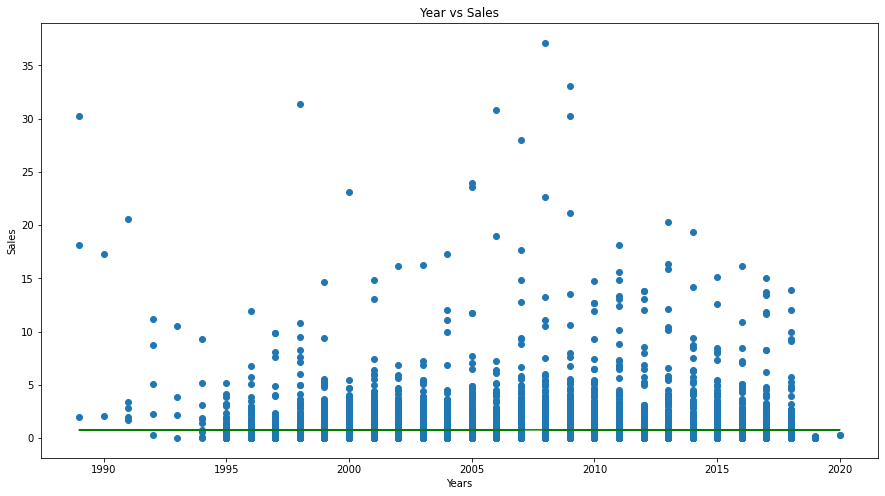

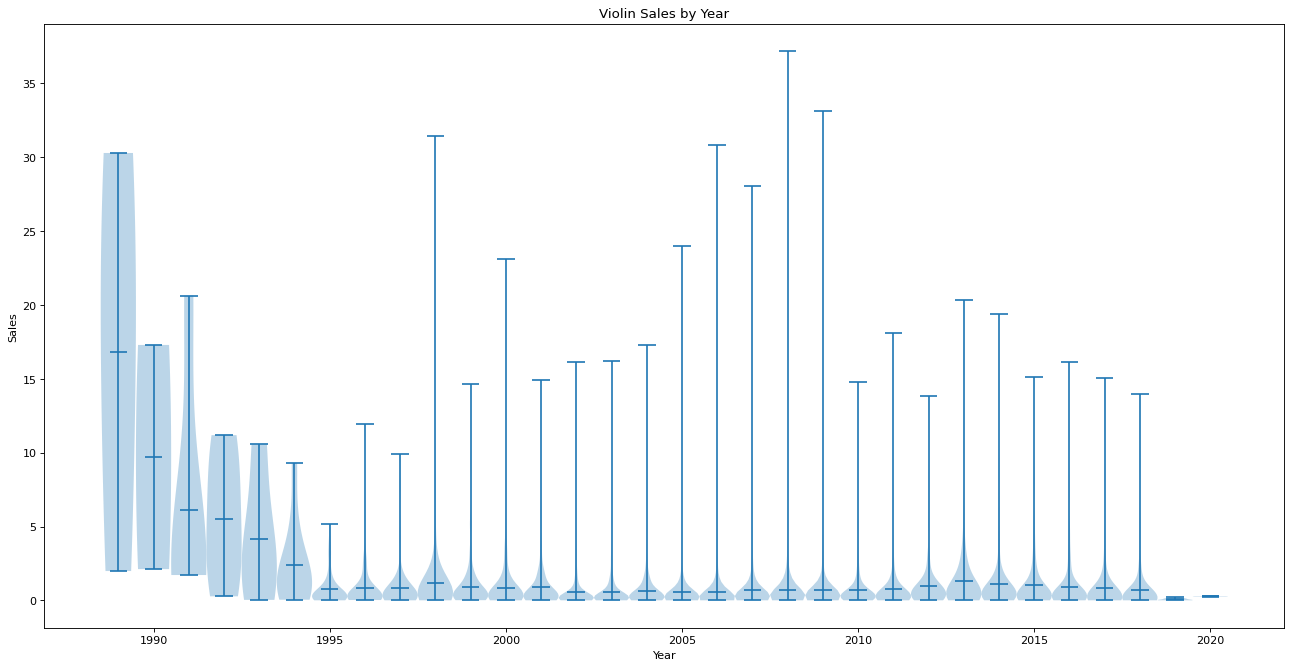

In [6]:
# drops certain observations because they appeared to be outliers
year_df = df.copy()
year_df = year_df[year_df.Name != 'Wii Sports']
year_df = year_df[year_df.Publisher != 'PUBG Corporation']
year_df = year_df[year_df.Year != 1970]

# plots year vs total sales
X = year_df['Year']
Y = year_df['Total_Sales']
plt.figure(figsize=(15, 8))
plt.title("Year vs Sales")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.scatter(X, Y)

# fits a trend line, colors depending if it is a positive or negative slope
m, b = np.polyfit(X, Y, 1) 
c = "r"
if (m>0):
    c = "g"
plt.plot(X, m*X + b, color=c)

year_list = year_df.Year.unique()
violin_exp = []

# shapes data into array for better plotting
for i in year_list:
    violin_exp.append(year_df[year_df['Year'] == i]['Total_Sales'].to_numpy())

# makes violin plot of sales distributions per year
plt.figure(figsize=(20, 10), dpi=80)
plt.violinplot(violin_exp, year_list, widths=1, showmeans=True) 
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Violin Sales by Year")

The Year vs Sales plots did not do a very good job in accurately showing any relationships. The violin plot showed 1989 as very dense in regard to sales, when in reality it only represents 3 data points. Meanwhile, the years surrounding 2010 are so dense with datapoints that the distribution of sales is not properly reflected.

We decided for now to continue and re-explore year vs. sales data using other independent variables. 
We explore 4 primary columns:
- ESRB_Rating
- Genre
- Country (of development)
- Platform

### ESRB and Genre vs Sales

To get started with independent variables, we decided to first use ESRB Rating and Genre to explore their impact on sales.

ESRB Rating could potentially be a fluid continuous variable that could show correlation since the ratings technically go from youngest to oldest (EC, E, E10, T, M). Potential hypothesis that could be formed from ESRB ratings could be sales tendency towards more accessible games if games rated E turn out to be the most successful, or even show that games tend to have an older audience if games rated T or M ended up on top (assuming young kids aren't playing Mature rated games, of course).

Even if no correlation is found, at the very least we could learn which ratings were the most popular and use it in future analysis.

Because there is a high number of data points, we used a scatter plot to first graph the two dataframes to show generally which genres/ratings were more successful. However, since the data of the popular dataframes was so dense, we couldn't really tell much from it.

We also dropped Wii Sports specifically because it's an outlier that made the data harder to visualize.

A general assumption that can be made is that the data is ordered from most to least sold, for example the Racing genre has sold more than the Sports genre. We decided to investigate this further. 

New dataframe:
- **ESRB_df**'s purpose is for cleaning ESRB_Rating data to be used in display. We also used it for Genre as well because the Genre column had no NaN values, and therefore we had no reason to use a separate genre dataframe since no extra cleaning had to be done.

In [7]:
# removes outliers
ESRB_df = df.copy()
ESRB_df = ESRB_df[ESRB_df.Name != 'Wii Sports']

X = ESRB_df['Genre']
X2 = ESRB_df['ESRB_Rating']
Y = ESRB_df['Total_Sales']

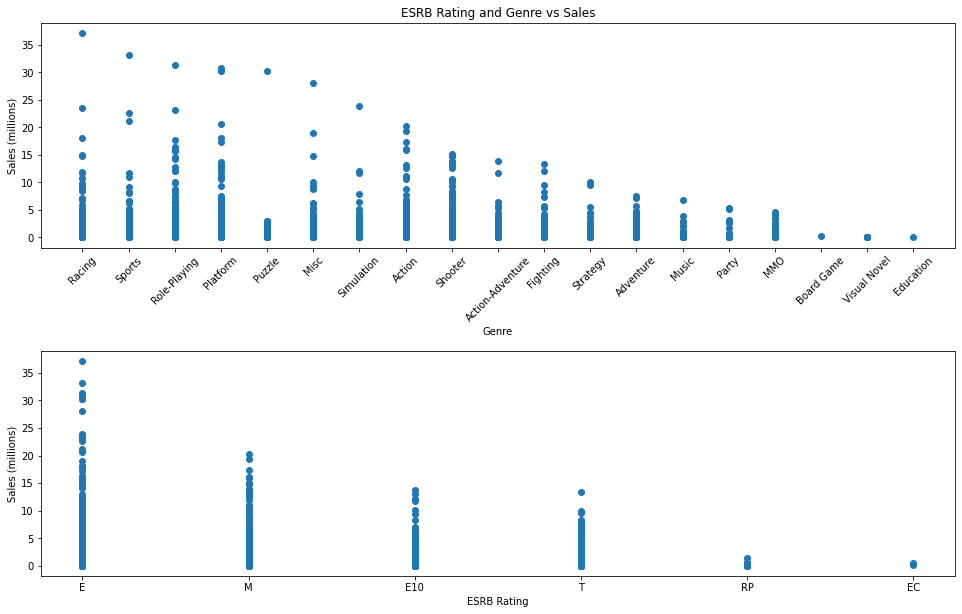

In [8]:
# creates scatter plot of esrb ratings and genre against sales each
fig, axes = plt.subplots(2, figsize=(15, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.set_title("ESRB Rating and Genre vs Sales")
ax1.set_ylabel("Sales (millions)")
ax1.set_xlabel("Genre")
ax2.set_ylabel("Sales (millions)")
ax2.set_xlabel("ESRB Rating")
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
fig.tight_layout(pad=6.0)
ax1.scatter(X, Y)
ax2.scatter(X2, Y)

Because the points on the scatter plot are so grouped, it's hard to tell much from the data. We decided to use a violin plot to represent the same information except with data-point density also shown below. 

With the violin plot in place, we could now clearly see density of points.

<AxesSubplot:xlabel='ESRB_Rating', ylabel='Total_Sales'>

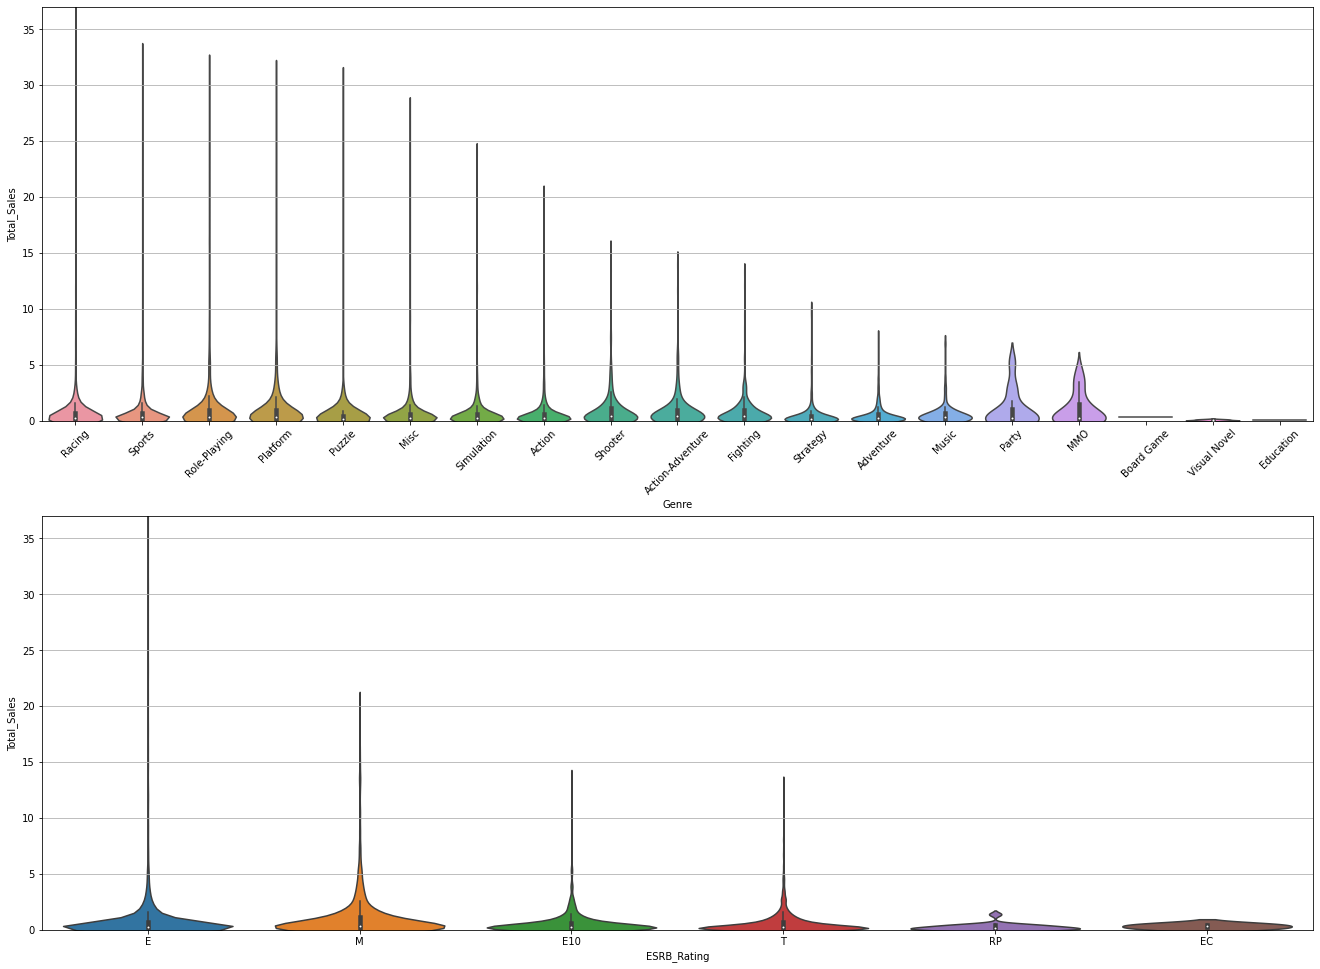

In [9]:
# creates violin plot of esrb ratings and genre against sales each
fig, axes = plt.subplots(2, figsize=(20, 15))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.grid()
ax2.grid()
ax1.set_ylim(0, 37)
ax2.set_ylim(0, 37)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
fig.tight_layout(pad=7.0)
sns.violinplot(x='Genre', y='Total_Sales', data=ESRB_df, ax=ax1, scale='width')
sns.violinplot(x='ESRB_Rating', y='Total_Sales', data=ESRB_df, ax=ax2, scale='width')

It's hard to tell any specific ordering or correlation from both the ESRB_Rating and Genre categories. We decided to plot each graph according to year to examine how well their sales data performed.

From this point on, we will be doing more exploration on how sales change over time for games in specific categories. To do this, we will use the function below that lets us plot each category of a specified variable over year.

In [10]:
# suppresses "poorly conditioned" warning
import warnings
warnings.simplefilter('ignore', np.RankWarning)

# function that lets you plot year vs sales for observations within the same categorical value of provided variable
def categorical_plot(var):
    
    # prepares unique categorical values, sets an array of spread out colors, sets up subplots
    vals = df[var].unique()
    colors = np.array(sns.color_palette("hls", len(vals)))
    fig, ax = plt.subplots(len(vals), figsize=(20, 40), sharex = True) 

    # for every unique value of that variable, create scatterplot, plot line of best fit
    for i in range(len(vals)):
        temp = df[df[var] == vals[i]]
        x = temp['Year']
        y = temp['Total_Sales'].to_numpy()
        ax[i].scatter(x, y).set_color(colors[i])
        ax[i].set_title(vals[i])
        ax[i].grid()
    
        # colors trend line depending on if it is a positive or negative slope
        m, b = np.polyfit(x, y, 1) 
        c = "r"
        if (m>0):
            c = "g"
        ax[i].plot(x, m*x + b, color=c)

### ESRB Sales data over time

Now looking at the data individually, we explore ESRB sales over time.

From looking at the plots below, we can now see that the best performing ESRB Rating games over time were M and E10. More importantly, we can also see the distribution of data points over the years. This helps us more accurately understand the data. For example, not shown in the violin/scatter plots above is the low number of data points in the EC and RP categories. From that we can also conclude that the regression line has less meaning in those contexts.

Other observations:
- E and T ratings are fairly consistent in sales over the years.
- M rating over the years has not only grown in quantity but also average sales.
- E10 rating has risen in average sales since 2004.

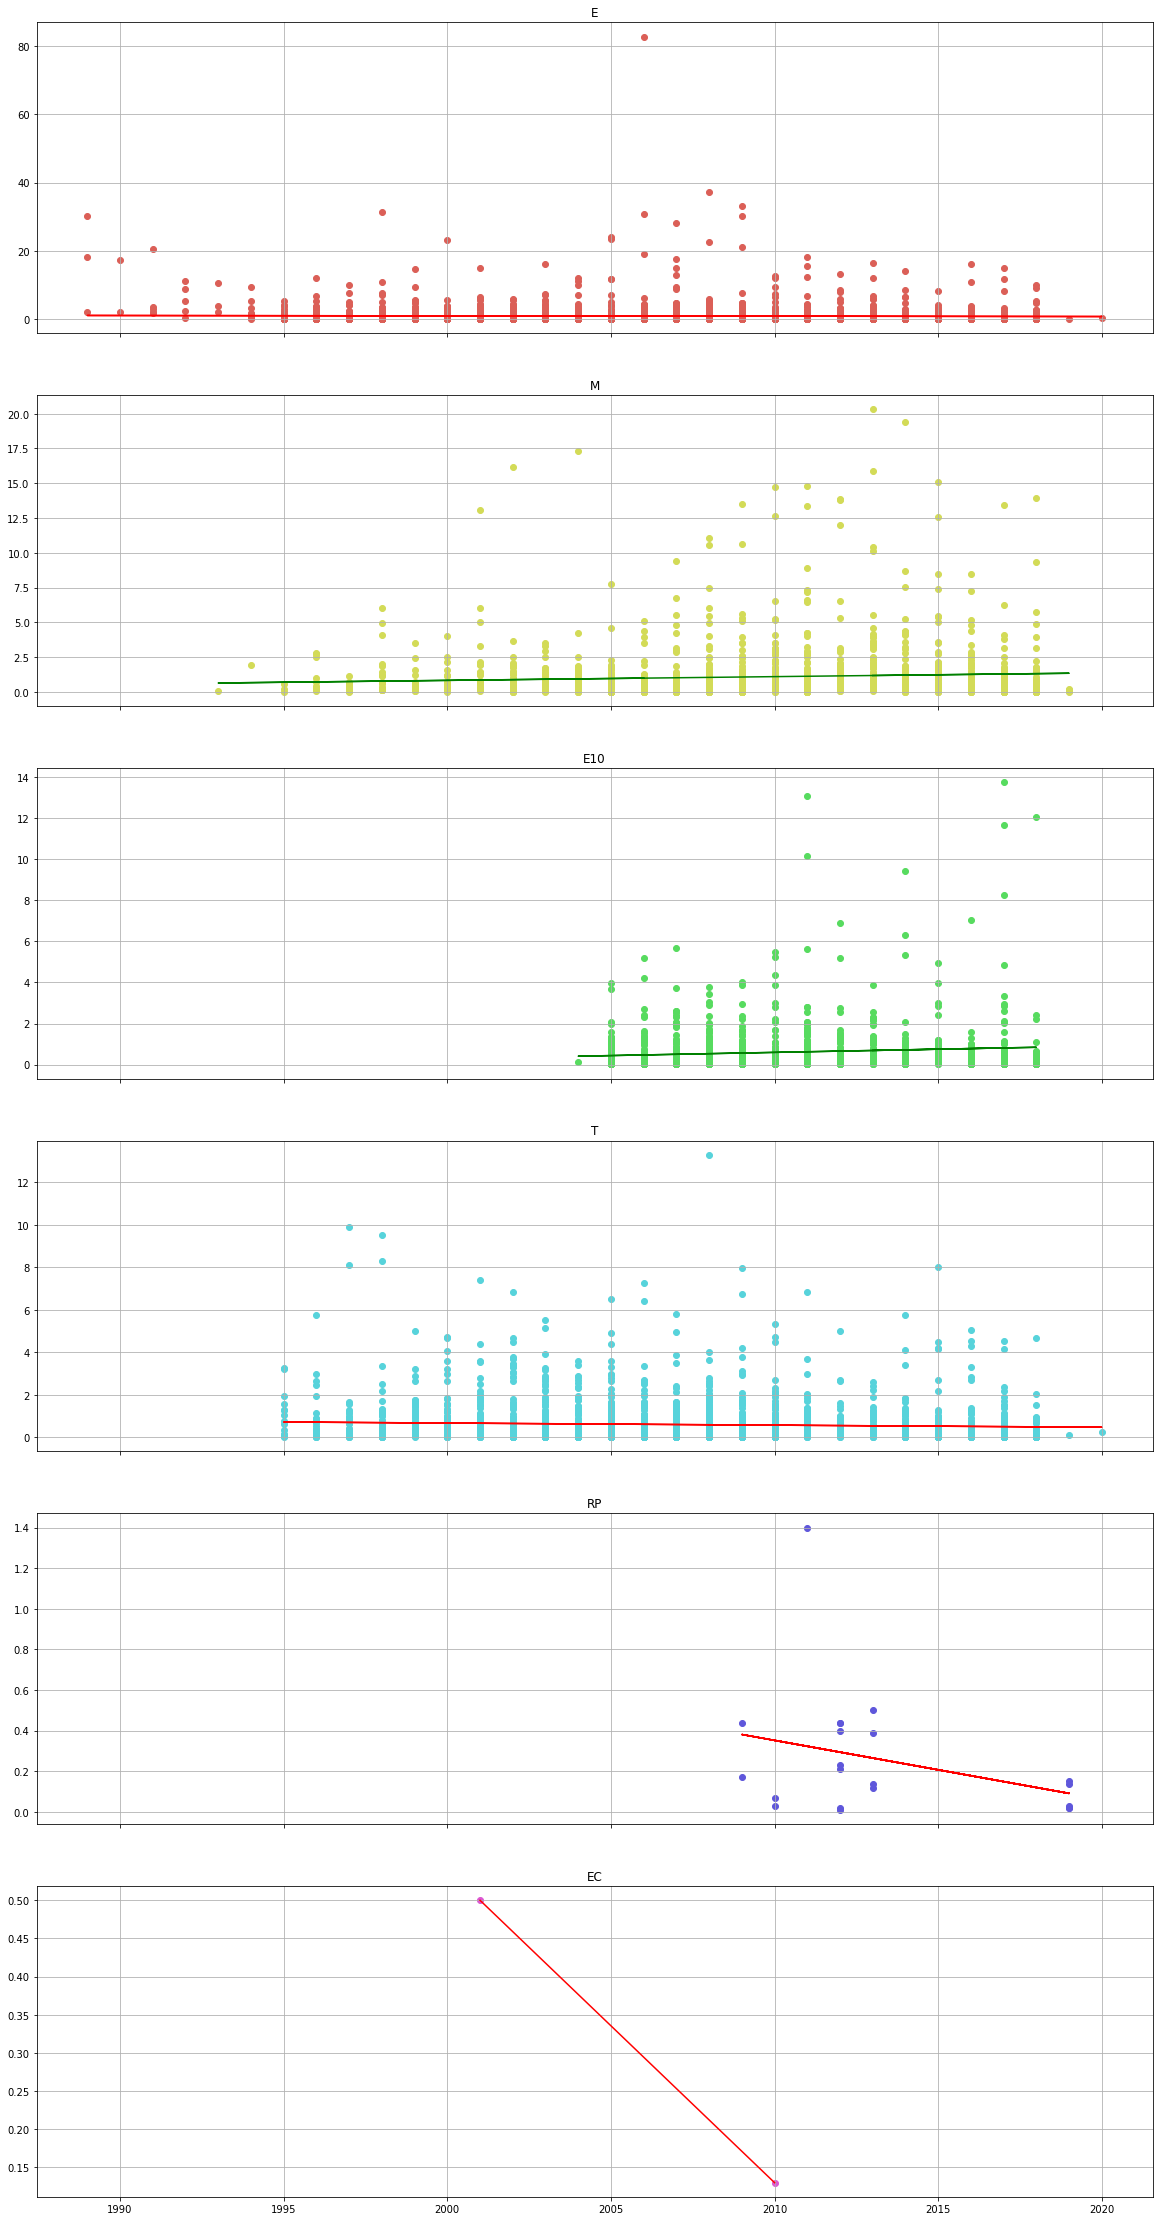

In [11]:
categorical_plot("ESRB_Rating")

### Genre Totals

Moving on into Genre, we wanted to be able to see which of the genres was the most popular. A new column 'Genre_Totals' was created by totaling the sales of each genre. This information could be used later as a feature in later analysis.

New Column:
- Genre_Totals: Total sales per genre

In [12]:
df["Genre_Totals"] = df.groupby(["Genre"])["Total_Sales"].transform(sum)
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer_x,VGChartz_Score,Critic_Score,User_Score,Year,Last_Update,url,status,Vgchartzscore,img_url,Country,Total_Sales,Genre_Totals
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg,Japan,82.86,1197.65
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg,Japan,37.14,647.07
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg,Japan,33.09,1197.65
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,NaN,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png,Japan,31.38,788.42
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,8.1,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg,Japan,30.80,735.82


### Plotting Sales by Genre

In plotting the top genre categories, we can now see which genres have grossed the highest sales regardless of time.

Racing in the earlier scatter plots was first, but here we see Racing at 6th in terms of overall sales.

Using this data for further analysis will help us put data into the context of the most popular genres.

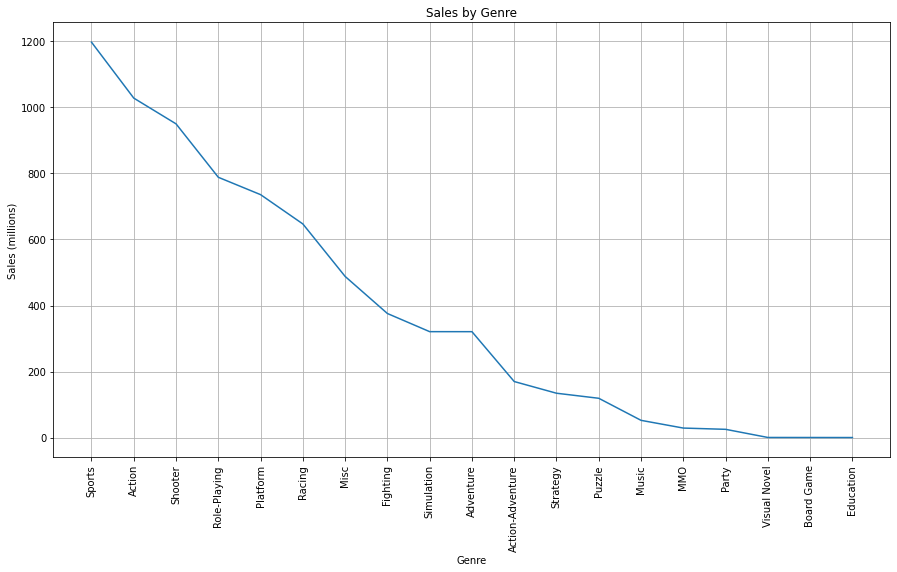

In [13]:
# sorts total sales in each genre in descending order
genre_df = df.sort_values(by=['Genre_Totals'], ascending=False)
X = genre_df['Genre']
Y = genre_df['Genre_Totals']

# displays chart of genre sales in order
plt.figure(figsize=(15,8))
plt.title("Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Sales (millions)")
plt.grid()
plt.xticks(rotation='vertical')
plt.plot(X, Y)

### Sales by Genre over time

In order to further contextualize the plot of sales by genre, we plot it over time.

By doing so we can further analyze the impact of genre on sales and come to a few of these following conclusions:
- Sports games are the top grossing genre from the previous graph, but only has a slight increase in sales over time. The same can be said of a few other top categories (Action, Fighting)
- Genres with higher growth over time are MMO, Shooter, Action/Adventure.
- The newer a genre is compared to others has no correlation to sales. Action/Adventure, MMO, Party, Music, and Visual are all newer genres made between 2000-2010, yet aren't similar in terms of sales growth over time.

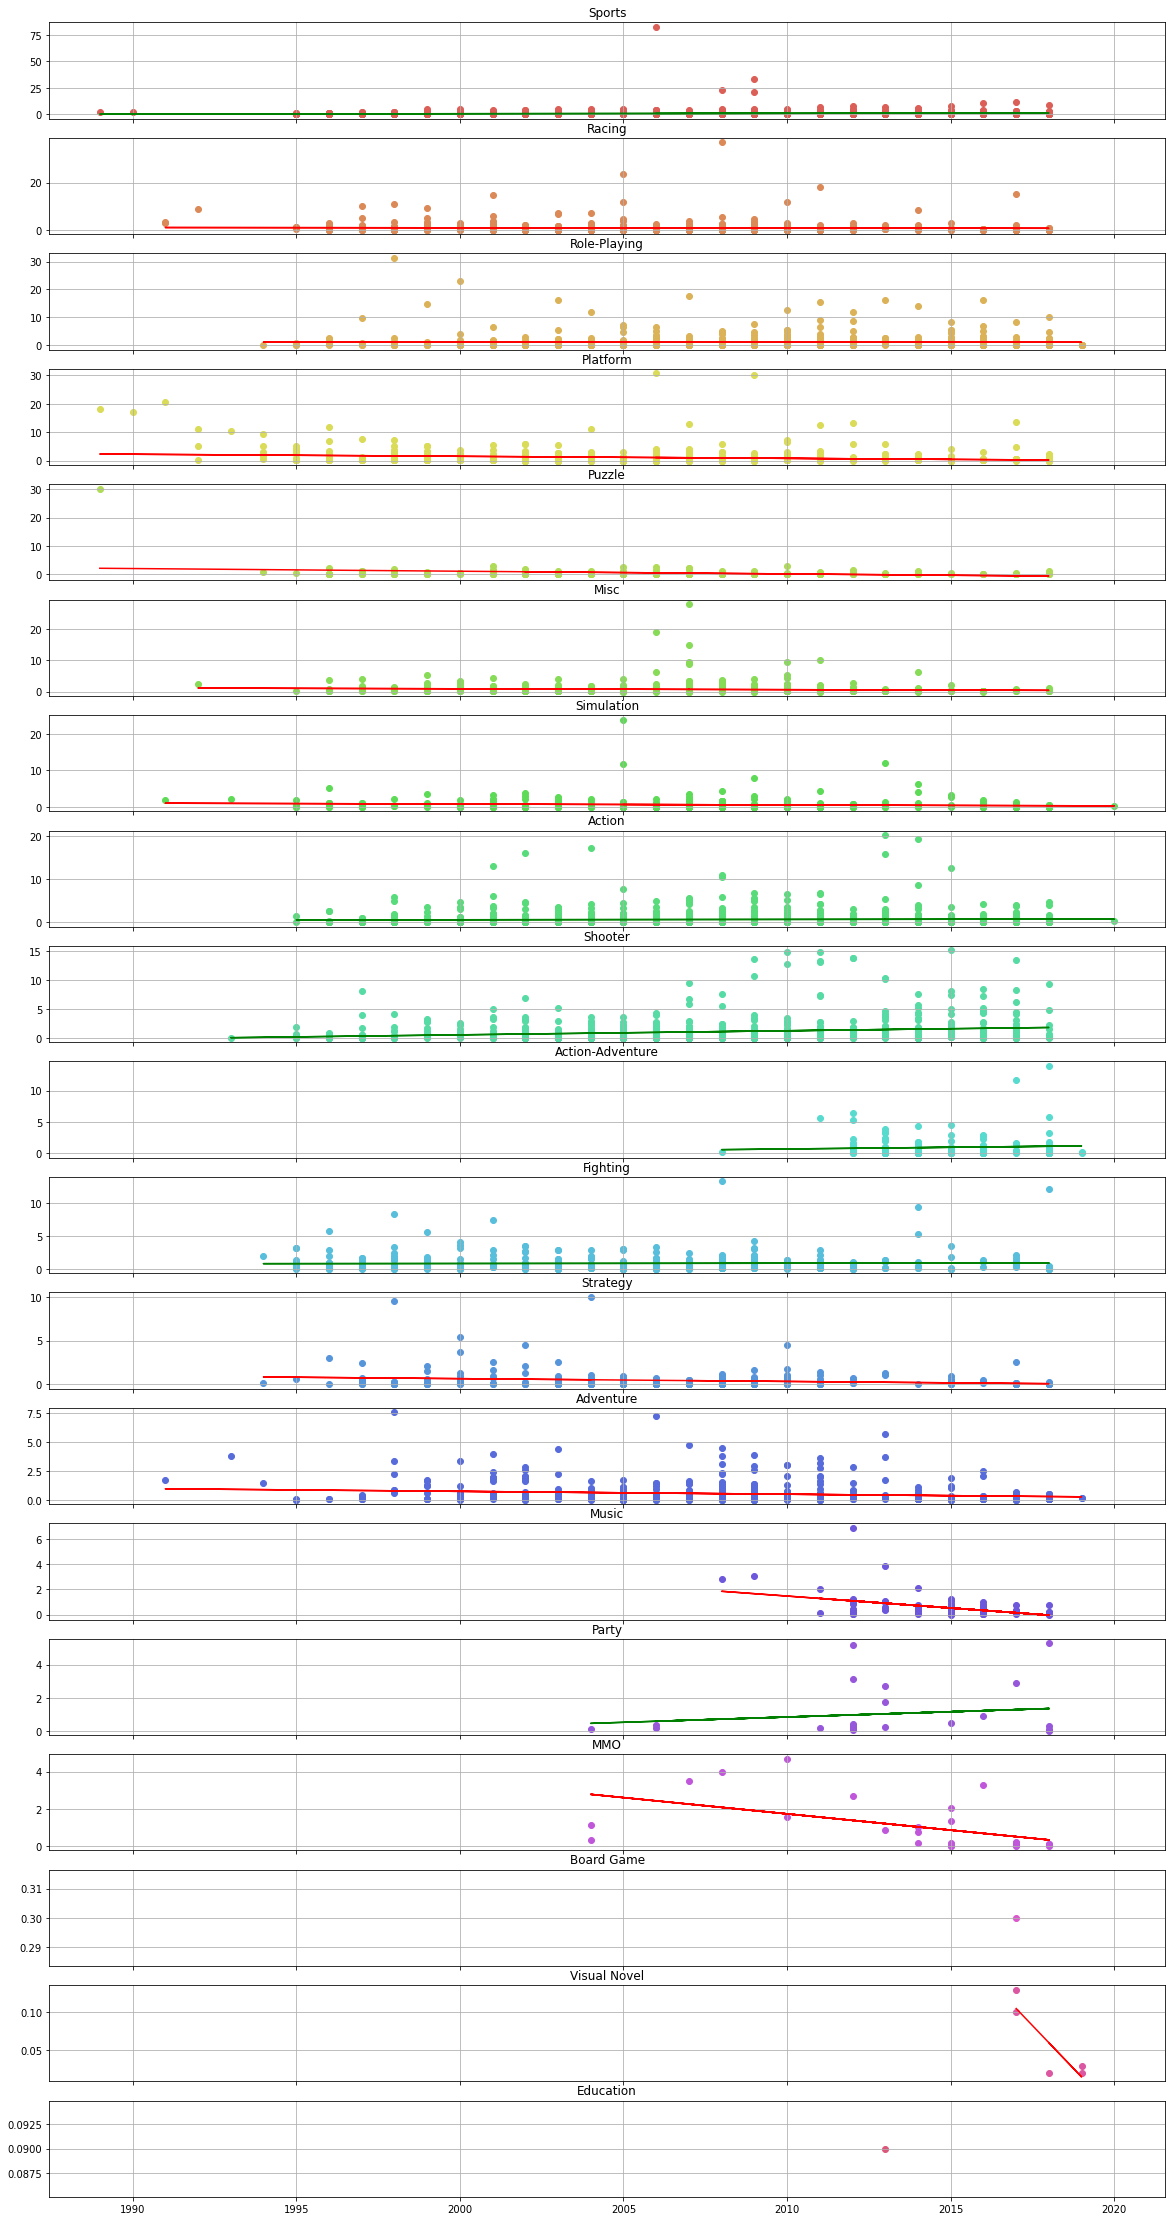

In [14]:
categorical_plot("Genre")

### Sales per Country

In order to further analyze the year vs sales correlation, we decided to also analyze sales by the country column to see if a games country of development had any impact upon the games sales.

Japan and USA are known to be major game producers. As veteran game production countries, a hypothesis about them could be that in comparison to other countries they would have higher sales, or a growth of sales over time as game development technology would also improve over time.

Once again removed Wii Sports as it's an outlier.

New Column:
- Country_Sales: Total sales per country

New Dataframe:
- **country_df**: Holds Country_Sales which assigns total sales to each country. 

In [15]:
# sums up all country sales, sort, and removes wii sports
country_df = df.copy()
country_df["Country_Sales"] = country_df.groupby(["Country"])["Total_Sales"].transform(sum)
country_df = country_df.sort_values(by=['Country_Sales', 'Total_Sales'], ascending=False)
country_df = country_df[country_df['Name'] != "Wii Sports"]
country_df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer_x,VGChartz_Score,Critic_Score,...,Year,Last_Update,url,status,Vgchartzscore,img_url,Country,Total_Sales,Genre_Totals,Country_Sales
19,20,Grand Theft Auto V,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,NaN,9.4,...,2013.0,NaN,http://www.vgchartz.com/game/65884/grand-theft...,1,NaN,/games/boxart/full_6510540AmericaFrontccc.jpg,United States,20.32,1028.25,4253.69
20,21,Grand Theft Auto V,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,NaN,9.7,...,2014.0,03rd Jan 18,http://www.vgchartz.com/game/83196/grand-theft...,1,NaN,/games/boxart/full_5563178AmericaFrontccc.jpg,United States,19.39,1028.25,4253.69
26,27,Grand Theft Auto: San Andreas,grand-theft-auto-san-andreas,Action,M,PS2,Rockstar Games,Rockstar North,NaN,9.5,...,2004.0,NaN,http://www.vgchartz.com/game/3427/grand-theft-...,1,NaN,/games/boxart/3887656ccc.jpg,United States,17.30,1028.25,4253.69
30,31,Grand Theft Auto: Vice City,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,NaN,9.6,...,2002.0,NaN,http://www.vgchartz.com/game/896/grand-theft-a...,1,NaN,/games/boxart/827563ccc.jpg,United States,16.15,1028.25,4253.69
32,33,Grand Theft Auto V,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,NaN,NaN,...,2013.0,NaN,http://www.vgchartz.com/game/65883/grand-theft...,1,NaN,/games/boxart/full_9218923AmericaFrontccc.jpg,United States,15.86,1028.25,4253.69


### Plotting Sales by Country

Using a violin plot to show sales by country allows us to directly see how each country compares to each other in terms of sale density.

From the plot below we can conclude that Japan and US lead in terms of highest sales, but it's still hard to tell because of datapoint density. We know from the data that Japan has multiple gaming titles in the 30+ million category, yet it isn't shown because of how skewed the violin plots are.

We can conclude one of our current hypotheses, which is that though Japan and the US are the highest producers in game development, their average sales per game is in the 1-2 million range. What is interesting is that South Korea's average sales per game is higher than both Japan and United States.

We can also observe South Korea and Finland having fairly dense sales groupings compared to their non-Japan/US countries. We will further explore these.

Text(0.5, 1.0, 'Violin Sales by Country')

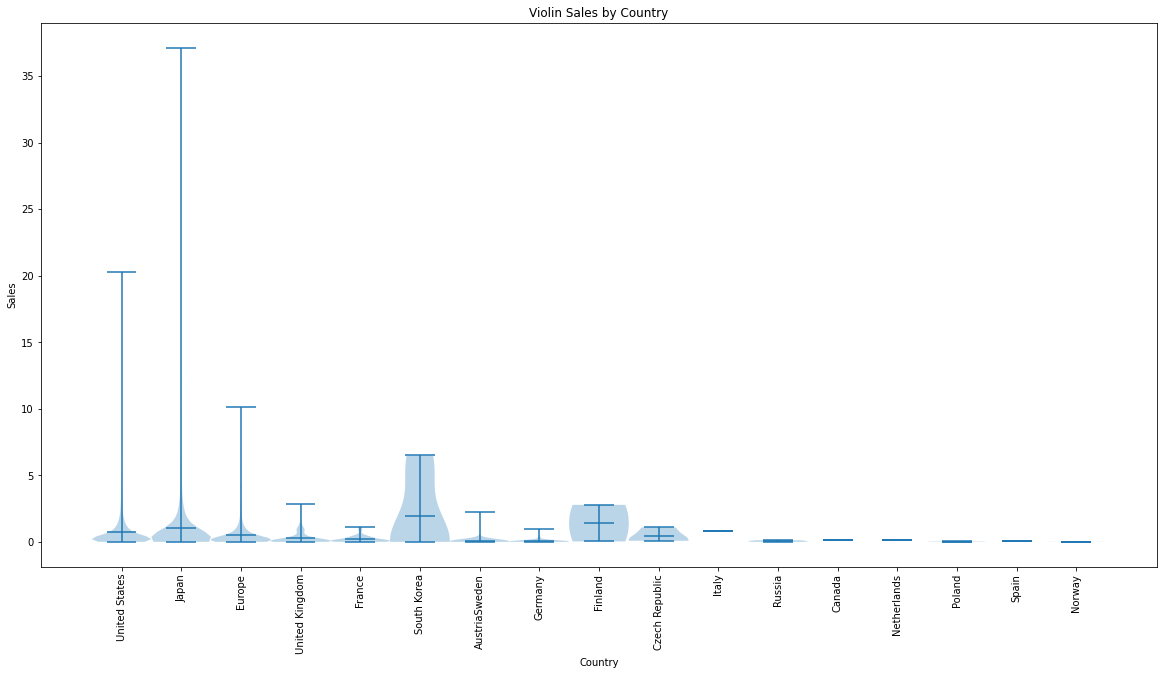

In [16]:
country_list = country_df.Country.unique()
violin_country = []

# shapes data into array for better plotting
for i in country_list:
    violin_country.append(country_df[country_df['Country'] == i]['Total_Sales'].to_numpy())

# makes violin plot of sales distributions by country
country_pos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(country_pos) 
ax.set_xticklabels(country_list, rotation='vertical')
plt.violinplot(violin_country, country_pos, widths=1, showmeans=True) 
ax.set_xlabel("Country")
ax.set_ylabel("Sales")
ax.set_title("Violin Sales by Country")

### Sales by Country over time

After visualizing the plot, we can now come to conclusions on some of our previous hypotheses regarding country. We also explore some of our observations.

For our hypotheses on Japan and the US, we can observe from the graphs that the significance of being one of the two top game producing countries is that the threshold for sales is FAR higher than 3rd place, Europe. In terms of sales growth over time, both the Japan and US are fairly stagnant.

We can also look further into our observation on South Korea and Finland. Both of them have very few values, and therefore the data isn't well represented above. Therefore there is no real conclusion to be gained about how South Korea and Finland are at producing selling games.

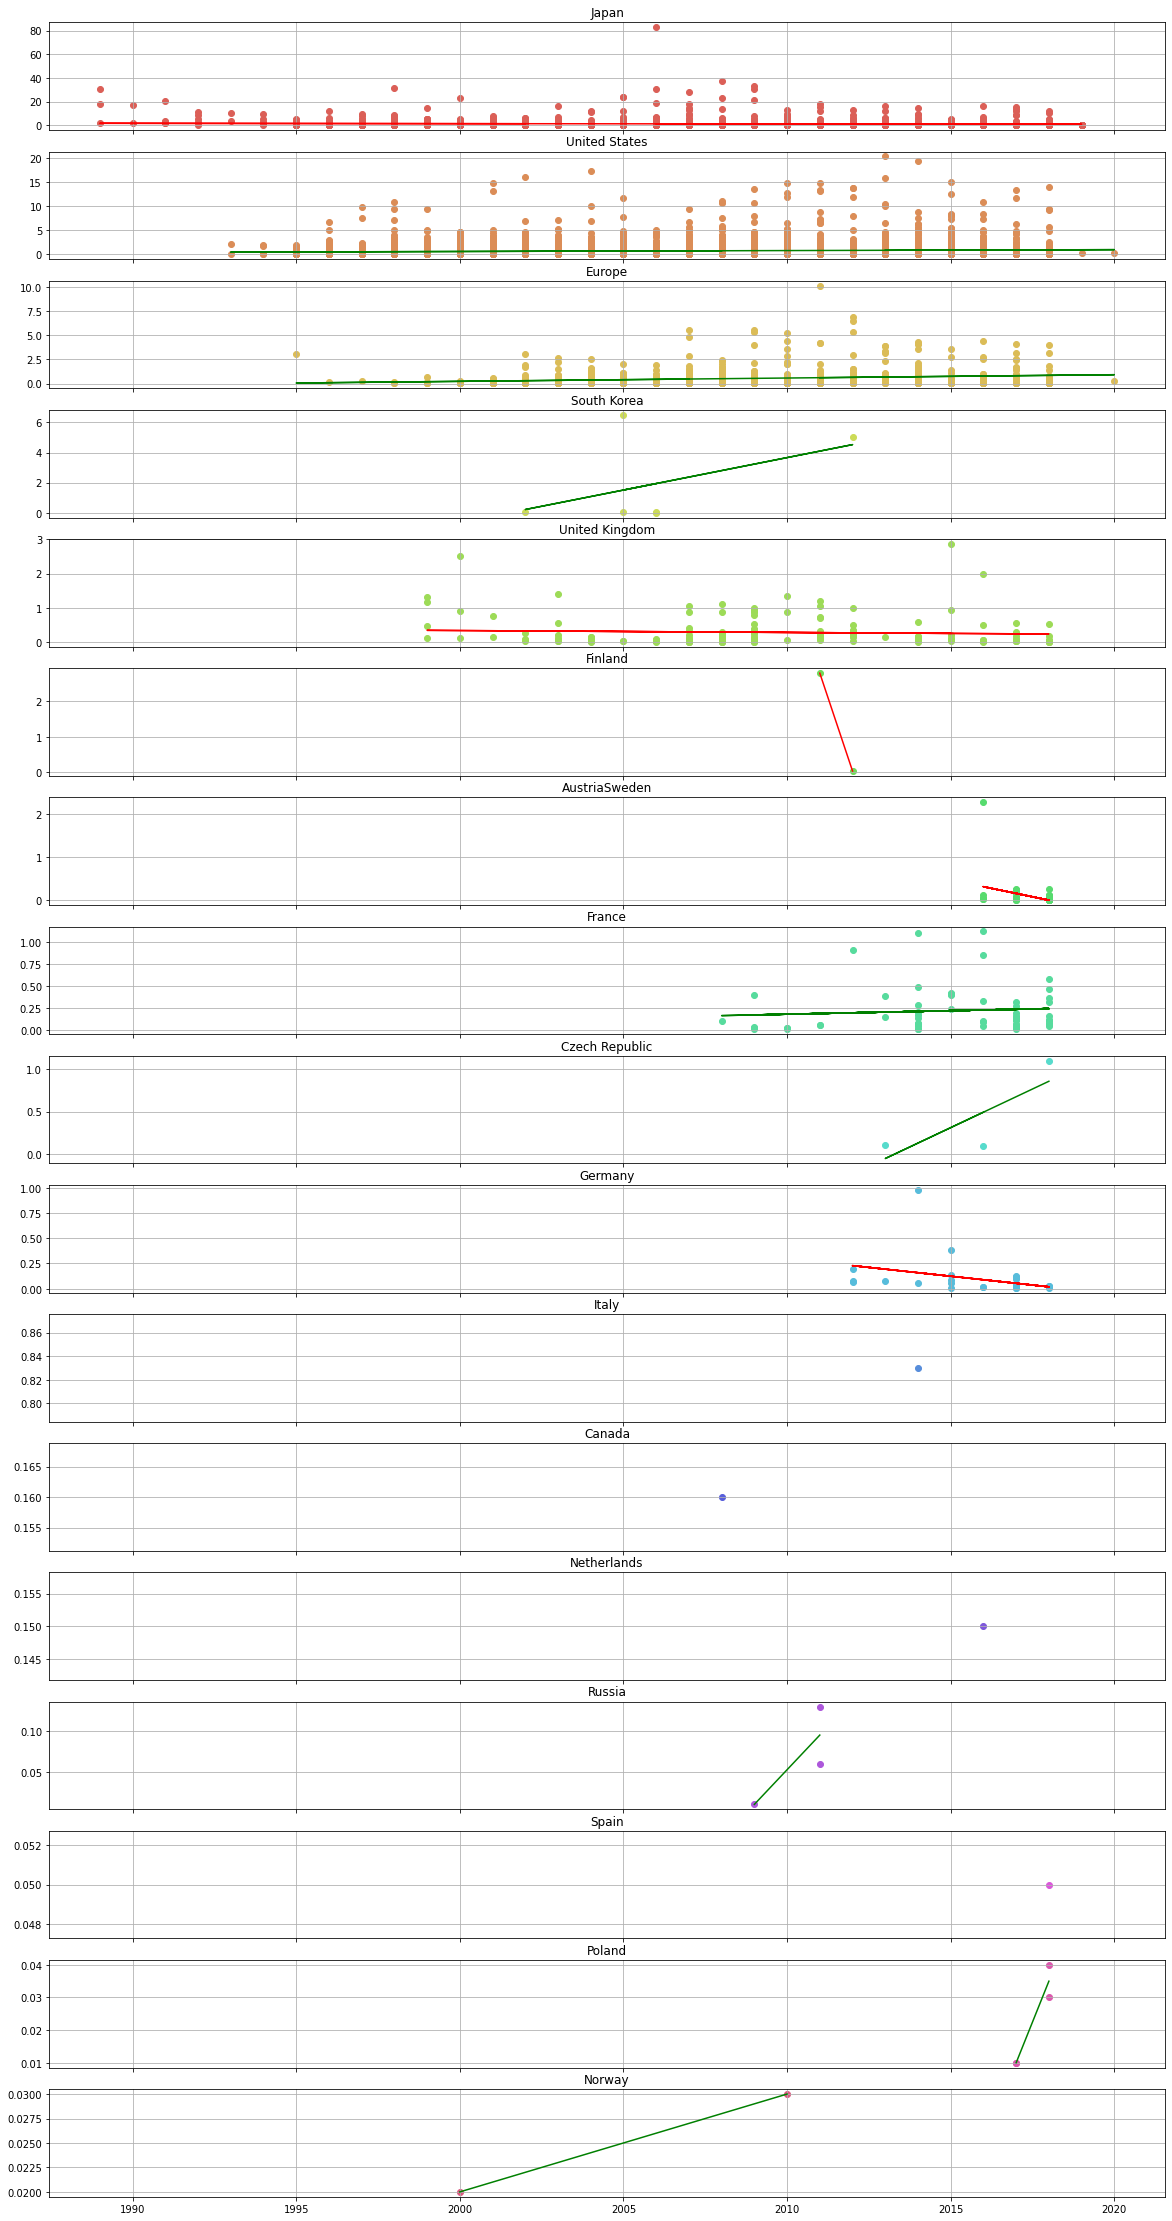

In [17]:
categorical_plot("Country")

### Sales by Platform

This is important to view because what if the overall negative correlation of sales over time is because certain platforms are more negative than others? Are there any platforms with a positive correlation of sales over time?

First I show the 10 most popular consoles, and then further explore if they could have a positive sales over time.

From the Top 10 Platform sales no conclusion can be drawn yet, but we can take note of how consoles seem to be performing generally better than handheld or PC.

New Columns:
- Platform_Sales: Total sales per platform

New Dataframe:
- **platform_df**: isolates the Platform and Platform_Sales columns.

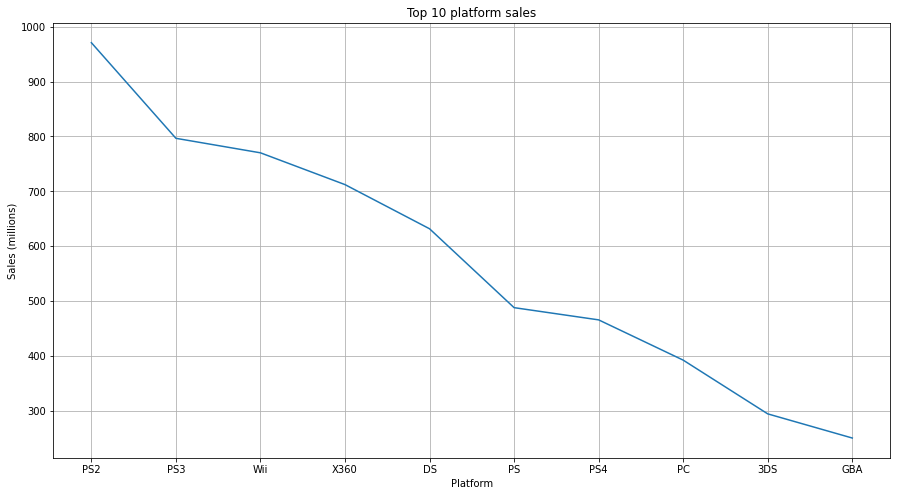

In [18]:
# sums up sales in each platform and sorts in descending order
df["Platform_Sales"] = df.groupby(["Platform"])["Total_Sales"].transform(sum)
platform_df = df[['Platform', 'Platform_Sales']].drop_duplicates().sort_values(by=['Platform_Sales'], ascending=False)

# displays chart of platform sales in order
top_platforms = platform_df.head(10)['Platform'].tolist()
plt.figure(figsize=(15,8))
plt.title("Top 10 platform sales")
plt.ylabel("Sales (millions)")
plt.xlabel("Platform")
plt.grid()
plt.plot(platform_df.head(10)['Platform'], platform_df.head(10)['Platform_Sales'])

### Sales by Platform over time

Next we plot the sales of platforms over time to see how each platform performs. Some observations:
- Majority of platforms other than Xbox360 (and Genesis, but it has too few data points to be considered) have a negative/constant slope. 
- A general trend for sales is that in the first few years the sales of a console goes well, after which it falls low.
- PC as a platform is the most consistent by years, yet is seemingly constant/slightly negative in sales over time. We will explore PC later.
- All of the best selling platforms (other than Xbox360) are clearly decreasing in sales over time. A possible conclusion to this is because they are consoles that have been out for a while, so it's only natural that they are decreasing. However, what about newer consoles, such as the Nintendo Switch, that are less affected by the dying console hype?

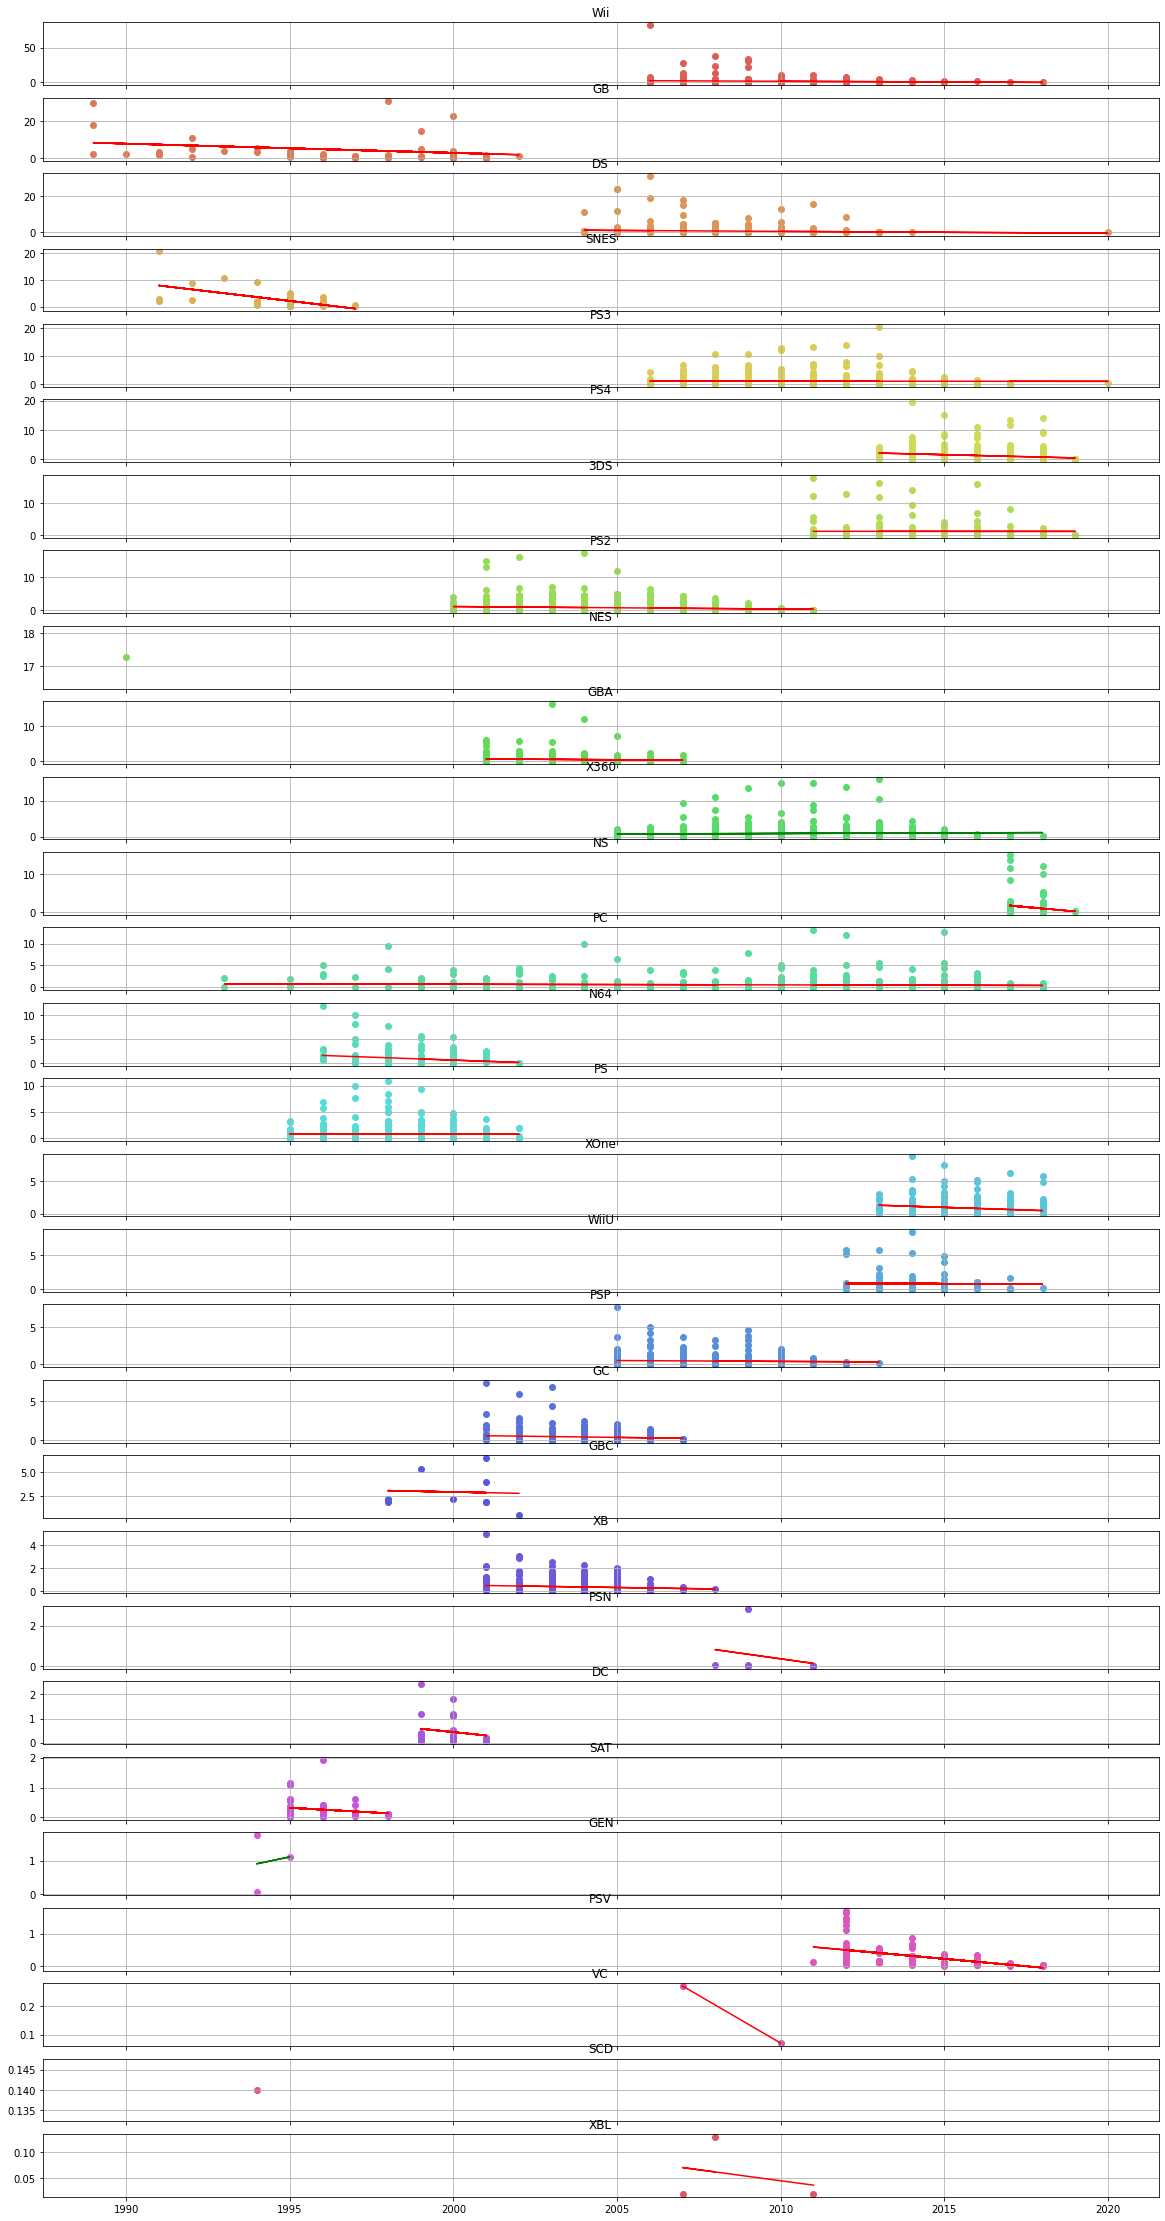

In [19]:
categorical_plot('Platform')

### Nintendo Switch sales analysis

As shown, even a newer console like the switch has sales that fall off after the first year. This may not be a fair statement to make however, since the PS2 was the console that thrived in the age of console excitement. Meanwhile, the Switch is a console that came years afterwards.

New Dataframe:
- **switch_pc_df**: For visualizing PC and Switch data. Removes outlier year 1970.

In [20]:
switch_pc_df = df.copy()
switch_pc_df = switch_pc_df[switch_pc_df['Year'] != 1970]
switch_pc_df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer_x,VGChartz_Score,Critic_Score,...,Year,Last_Update,url,status,Vgchartzscore,img_url,Country,Total_Sales,Genre_Totals,Platform_Sales
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg,Japan,82.86,1197.65,770.11
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg,Japan,37.14,647.07,770.11
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg,Japan,33.09,1197.65,770.11
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,...,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png,Japan,31.38,788.42,189.94
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,...,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg,Japan,30.80,735.82,631.68


Slope: -0.7652783894269193


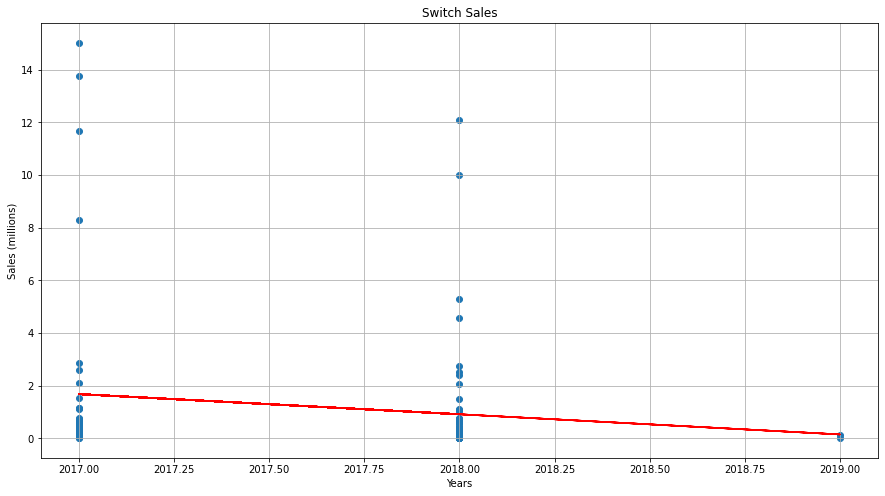

In [21]:
# creates scatter plot of Nintendo Switch sales over time
plt.figure(figsize=(15,8))
x = switch_pc_df[switch_pc_df['Platform'] == 'NS']['Year']
y = switch_pc_df[switch_pc_df['Platform'] == 'NS']['Total_Sales'].to_numpy() 
plt.scatter(x, y)
plt.title('Switch Sales')
plt.xlabel('Years')
plt.ylabel('Sales (millions)')
plt.grid()
m, b = np.polyfit(x, y, 1) 
c = "r"

# plots trend line, colors it depending on positive or negative slope
if (m>0):
    c = "g"
plt.plot(x, m*x + b, color=c)
print("Slope:",m)

### New consoles are released regularly, but what about PC?
I assume from looking at the previous plot that console excitement falls off fast with each new release - soon after Switch came PS5 and XBox Series X. However, PCs are a constant Platform that remains throughout the years and only improves over time. Do PC sales grow or remain constant over time?

As shown below even PC has a negative slope. However, it can be seen that the density of PC sales over time grows.

Slope: -0.015147945047192071
Intercept: 31.017903126711282


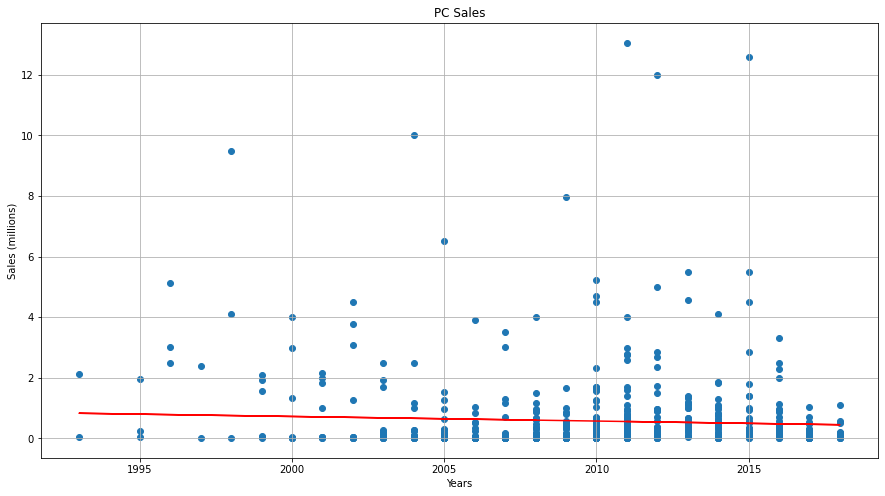

In [22]:
# creates scatter plot of pc sales over time
plt.figure(figsize=(15,8))
x = switch_pc_df[switch_pc_df['Platform'] == 'PC']['Year']
y = switch_pc_df[switch_pc_df['Platform'] == 'PC']['Total_Sales'].to_numpy() 
plt.scatter(x, y)
plt.title('PC Sales')
plt.xlabel('Years')
plt.ylabel('Sales (millions)')
plt.grid()
m, b = np.polyfit(x, y, 1) 
c = "r"
if (m>0):
    c = "g"

# plots trend line, colors it depending on positive or negative slope
plt.plot(x, m*x + b, color=c)
print("Slope:", m)
print("Intercept:", b)

## Hypothesis Testing and Machine Learning
At this point, we have explored the data to reveal some of the relationships between different variables. But, we still want to be able to construct a model of how good a game will sell. One of the strongest continuous variables that affects the sales of a game is, of course, the year. We can first try to fit a Linear Regression model of video game sales over the years. For this, we will be using a new module called Sci-Kit Learn. Note that we are not going to split the data because we want to take the entire dataset into account. Given the spread of the data, we do not need to worry about overfitting the linear regression model.

In [23]:
# import necessary modules
import sklearn
from sklearn.linear_model import LinearRegression

# fit the linear regression model
X = df["Year"].to_frame()
y = df["Total_Sales"]
reg = LinearRegression().fit(X, y)
print("y = ", reg.coef_[0], "x + ", reg.intercept_)

y =  -0.00019884553397136605 x +  1.1858283831790628


As you can see, we have come up with a simple y=mx+b model. According to our newly generated model, the sales for a game generally decrease by about two hundred USD after each year. This somewhat makes sense given the general decreasing trend we have seen from earlier explorations. Usually, the time a game gets released is when there is the most hype for a game. Games may update and introduce new content during its lifetime, but eventually the hype will fade at some point, resulting in an overall decline in sales. This might explain the overall decreasing trend we see. We can plot this model on top of our data so we can see how well it fits.

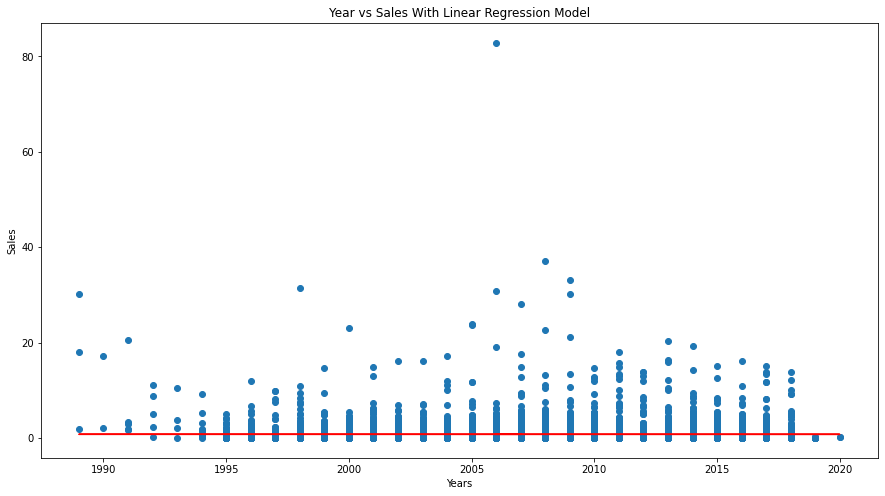

In [24]:
# predicts sales based off of year and stores predictions in seperate column
resids = df[['Year', 'Total_Sales']].copy()
resids['Year'] = resids['Year'].astype(int)
resids['Predicted'] = reg.predict(resids['Year'].to_frame())
X = resids['Year']
Y = resids['Total_Sales']
P = resids['Predicted']

# plot the data and the model
plt.figure(figsize=(15, 8))
plt.title("Year vs Sales With Linear Regression Model")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.scatter(X,Y)
plt.plot(X, P, color='r')

As you can see, this plot looks almost identical to our first plot involving year and sales. Note that this plot has a different fit line than that earlier plot since we included all of the data, even the the outliers we excluded before. The bad news is, our model looks like it is going to have a lot of residuals, especially above the line. We can still plot out the residuals just to be sure. Since each year has its own distribution of sales, looking at a violin plot of residuals would also be useful in this case.

<AxesSubplot:title={'center':'Residual Game Sales per Year'}, xlabel='Year', ylabel='Residuals'>

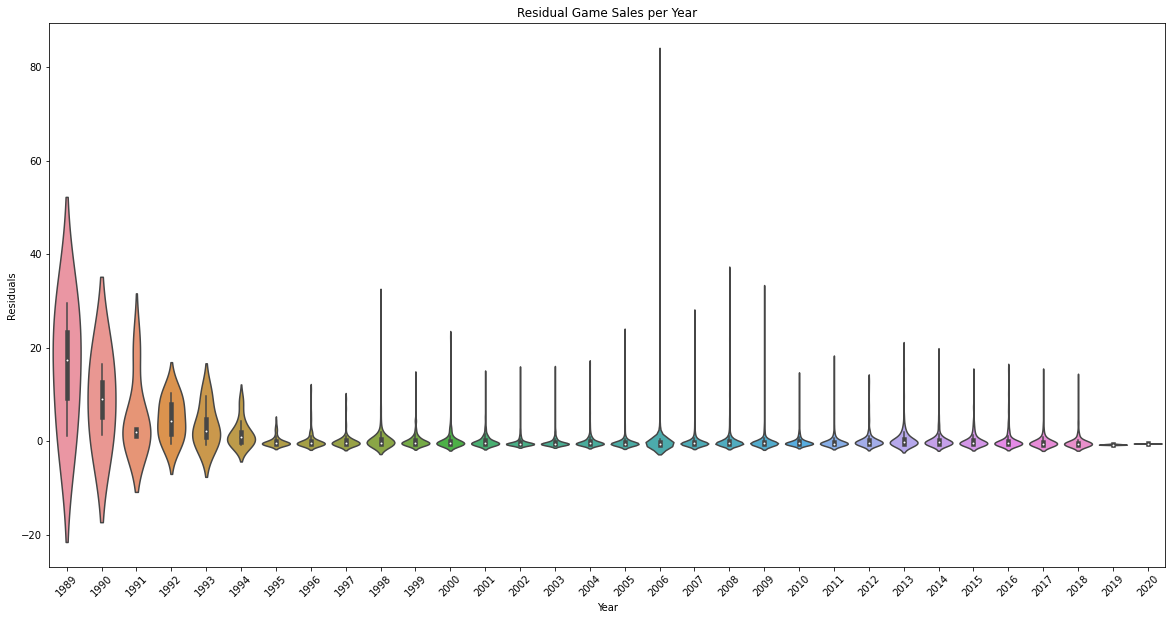

In [25]:
resids['Residuals'] = resids['Total_Sales'] - resids['Predicted']

# plots residual violin plot
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Residual Game Sales per Year")
plt.xticks(rotation=45)
sns.violinplot(x='Year', y='Residuals', data=resids, ax=ax, scale='width')

Just as previously predicted, our residual plot looks terrible. We have too many residuals above the linear model, resulting in a general pattern of residual distributions being skewed right for each year. At the very least, we seem to have uni-modal distributions across all years. We also have certain years with more symmetric looking distributions, such as the years 1989 through 1993. But, those years look rather off since the distributions have means greater than zero. So, this is still unsatisfactory as there seems to be no constant variance of residuals. Therefore, the next step we can take is to add features and interactions to our linear regression model. We can try adding interactions for the country the game originated from, the ESRB rating of the game, and the genre of the game. Interactions and features for linear models allow for multiple independent variables to affect the predicted outcome, resulting in the introduction of more terms into our model.

As you may have noticed, some of the plots above show that the general linear trend of the data for each ESRB, genre, and country value share the same pattern as the overall data: right-skewed, non-normal, unsymmetric, and uneven varianced distributions for each year. However, because some of the plots for a few of the categorical values actually seem promising, we would still like to try adding these values as interaction terms just to see if it makes anything better.

In [26]:
# setting up the dataframes
interaction = df[["Total_Sales", "Year"]].copy()

# gets dummy columns for each categorical value
genre_int = pd.get_dummies(df["Genre"])
esrb_int = pd.get_dummies(df["ESRB_Rating"])
country_int = pd.get_dummies(df["Country"])

# deletes last column to avoid dummy variable trap, but saves deleted value for later
deleted_genre = list(genre_int)[-1]
deleted_esrb = list(esrb_int)[-1]
deleted_country = list(country_int)[-1]
genre_int = genre_int.iloc[:, :-1]
esrb_int = esrb_int.iloc[:, :-1]
country_int = country_int.iloc[:, :-1]

# concatenates the dataframes
interaction = pd.concat([interaction, genre_int, esrb_int, country_int], axis=1)
columns = list(interaction)[2:]

# for every new dummy feature, add interaction term between it and the year
for col in columns:
    interaction["Year*" + col] = interaction["Year"] * interaction[col]

# fits a new linear regression model on the data with interaction terms
X = interaction.iloc[:, 1:].values
y = interaction.iloc[:, 0].values
reg = LinearRegression().fit(X, y)

print("Regression Coefficients:", reg.coef_, "\nConstant:", reg.intercept_, "\nNumber of parameters:", len(reg.coef_) + 1)

Regression Coefficients: [ 2.20960954e-01  4.54756922e+02  4.26617378e+02  5.14696137e+02
  1.10682606e-07  2.65103343e-07  4.26172496e+02  8.63792009e+02
  4.99352235e+02  8.63340605e+02  4.28483010e+02  5.90038978e+02
  6.26014730e+02  4.65165631e+02  4.51320918e+02  3.46415315e+02
  4.74158589e+02  3.85564529e+02  4.82902037e+02 -3.79136661e+01
 -1.08714304e+02  2.97066199e+01 -6.90728513e+01 -2.27501781e+01
  8.15278514e+01 -1.36073992e-07 -4.84952609e+02 -5.46198535e+01
  5.49801085e+03  1.43052911e+02  1.28616882e+02 -2.64599231e-08
  5.80848750e+01  1.04248228e-07  9.96956400e+01 -1.37114570e+03
 -1.22789928e+03 -8.33649437e+02  2.66013269e-08  4.55679968e+01
 -2.24960163e-01 -2.10933177e-01 -2.54887330e-01  2.00299123e-04
  4.92079389e-04 -2.10610352e-01 -4.27898642e-01 -2.47179760e-01
 -4.27793474e-01 -2.11788924e-01 -2.92221068e-01 -3.10479043e-01
 -2.30080029e-01 -2.23106118e-01 -1.70817102e-01 -2.34624791e-01
 -1.90453499e-01 -2.39064753e-01  1.90400182e-02  5.41376228e-02


Alright, after sucessfully fitting our new model, we can now test the residuals of it. Before we do that, let's first take a look at the the model's parameters to try to see if any of these coefficients are significantly far from zero. This way we can tell if any of these interactions we have added really make a difference. To do this, we will conduct a t-test on the set of parameters. Note that we are going to be using a two-tailed significance level of 0.05 since we want most things to be "close" to zero.

In [27]:
# first, calculate the standard deviation of the set's difference to zero (itself)
params = np.append(reg.coef_, reg.intercept_)
sx = np.std(params)

# then, since we have 80 parameters, our degrees of freedom = 79
# so, with our 0.05 significance level, our t value is +-1.6644 since we are conducting a two-tailed test
tdist = 1.6644

# now, we go through each value and see how far they are
counter = 0
for param in params:
    t = np.absolute(param / (sx / np.sqrt(80)))
    if t >= tdist or t <= -tdist:
        counter+=1
        
print("Number of parameters significantly different from zero:", counter)

Number of parameters significantly different from zero: 23


It seems that a small portion of the parameters are actually significantly different from zero. This means that some of our interactions may have a big effect on what the model might predict. Let's now test our model to see how the total sales will change each year depending on what kind of game it is. Here, we will calculate the average yearly change in total sales for a game in every genre, country, and esrb combination using dummy game values so we can get a good picture. Since there are too many different combinations between each category possible, we will only look at American games that are rated T for Teen.

In [28]:
num_genre_cols = len(list(genre_int))
num_esrb_cols = len(list(esrb_int))
num_country_cols = len(list(country_int))
sum_cols = num_genre_cols + num_esrb_cols + num_country_cols

# iterates through each genre type (must include ommited column)
for genre in range(num_genre_cols + 1):
    genre_encoding = [0] * num_genre_cols
    
    # places a one at corresponding column to encode genre, or nowhere to signify ommited type
    if genre < num_genre_cols:
        genre_encoding[genre] = 1
        genre_str = list(genre_int)[genre]
    else:
        genre_str = deleted_genre
    
    # fixed the esrb and country encodings to T for Teen and USA
    # comment this part out if you want to calculate average change for all combinations
    esrb_encoding = [0] * num_esrb_cols
    country_encoding = [0] * num_country_cols
        
    # finally calculates the average yearly change in total sales for this combination
    # comment this part out if you want to calculate average change for all combinations
    x = [0] + genre_encoding + esrb_encoding + country_encoding + ([0] * sum_cols)
    x_prime = [1] + ((genre_encoding + esrb_encoding + country_encoding) * 2)
    avg_change = reg.predict([x_prime])[0] - reg.predict([x])[0]
    
    # comment this print statement out if you only want to see average change for all combinations
    print("Average yearly change in sales for a T-Rated, American", genre_str, "game is", avg_change, "million USD.")
    
# This code is commented out that allows you to calculate the average change of total sales for every combination.
# We couldn't do it here because the output would have been too huge.
#
#    # iterates through each esrb type (must include ommited column)
#    for esrb in range(num_esrb_cols + 1):
#        esrb_encoding = [0] * num_esrb_cols
#    
#        # places a one at corresponding column to encode esrb, or nowhere to signify ommited type
#        if esrb < num_esrb_cols:
#            esrb_encoding[esrb] = 1
#            esrb_str = list(esrb_int)[esrb]
#        else:
#            esrb_str = deleted_esrb
#        
#        # iterates through each country (must include ommited column)
#        for country in range(num_country_cols + 1):
#            country_encoding = [0] * num_country_cols
#    
#            # places a one at corresponding column to encode esrb, or nowhere to signify ommited type
#            if country < num_country_cols:
#                country_encoding[country] = 1
#                country_str = list(country_int)[country]
#            else:
#                country_str = deleted_country
#                
#            # finally calculates the average yearly change in total sales for this combination
#            x = [0] + genre_encoding + esrb_encoding + country_encoding + ([0] * sum_cols)
#            x_prime = [1] + ((genre_encoding + esrb_encoding + country_encoding) * 2)
#            avg_change = reg.predict([x_prime])[0] - reg.predict([x])[0]
#            
#            print("Average yearly change in total sales for a(n)", genre_str, "game from", country_str,\
#                  "with an ESRB rating of", esrb_str, "is", avg_change, "million USD.")

Average yearly change in sales for a T-Rated, American Action game is -0.0039992092923171185 million USD.
Average yearly change in sales for a T-Rated, American Action-Adventure game is 0.010027777236302882 million USD.
Average yearly change in sales for a T-Rated, American Adventure game is -0.03392637589035985 million USD.
Average yearly change in sales for a T-Rated, American Board Game game is 0.2211612532623235 million USD.
Average yearly change in sales for a T-Rated, American Education game is 0.22145303352857582 million USD.
Average yearly change in sales for a T-Rated, American Fighting game is 0.010350602481310034 million USD.
Average yearly change in sales for a T-Rated, American MMO game is -0.20693768816079228 million USD.
Average yearly change in sales for a T-Rated, American Misc game is -0.026218806189888255 million USD.
Average yearly change in sales for a T-Rated, American Music game is -0.206832519698537 million USD.
Average yearly change in sales for a T-Rated, Amer

From our results, it seems that within all the American T-Rated games, the genres that seem to increase the most in sales are Board Games, Educational Games, and Visual Novels, rising at about 220 thousand USD per year. On the other hand, the genres that seem to decrease the most in sales within the same scope are MMO and Music Games, decreasing at about 200 thousand USD per year. However, these calculations won't really mean anything if the residuals are still terrible. First, let's observe the data once more with our new model plotted on top just so we can see what it looks like.

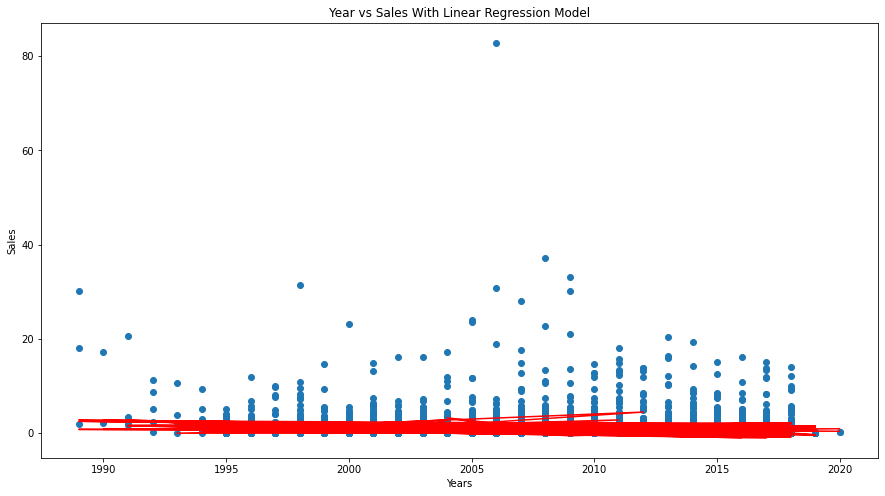

In [29]:
# predicts sales based off of year and categorical values, stores in seperate column
resids = interaction.copy()
resids['Year'] = resids['Year'].astype(int)
resids['Predicted'] = reg.predict(resids.iloc[:, 1:])

X = resids['Year']
Y = resids['Total_Sales']
P = resids['Predicted']

# plot the data and the model
plt.figure(figsize=(15, 8))
plt.title("Year vs Sales With Linear Regression Model")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.scatter(X,Y)
plt.plot(X, P, color='r')

This model might look a bit weird at first glace, but we must remember that this model is no longer a singular straight line, and that it is now a model with various interactions of multiple categorical variables. Different as it may seem, the model still looks to be around the same place as before. Therefore, we can pretty much guess that this model is not that much of an improvement from the previous one. But, let's look at our residuals just to be sure.

<AxesSubplot:title={'center':'Residual Game Sales per Year With Genre, Country, and ESRB Rating as Interaction Terms'}, xlabel='Year', ylabel='Residuals'>

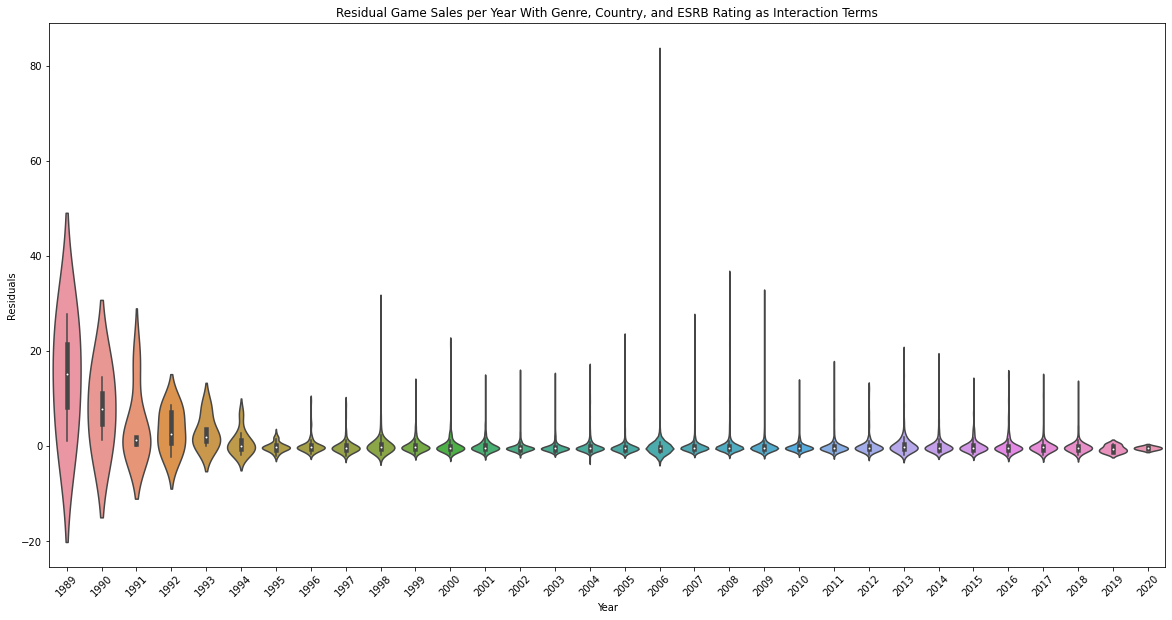

In [30]:
resids['Residuals'] = resids['Total_Sales'] - resids['Predicted']

# plots residuals
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Residual Game Sales per Year With Genre, Country, and ESRB Rating as Interaction Terms")
plt.xticks(rotation=45)
sns.violinplot(x='Year', y='Residuals', data=resids, ax=ax, scale='width')

As guessed, it seems that we do not have much improvement from our previous model, as our residual plot looks exactly the same as before. Our residuals are still heavily skewed right for a lot of our years past 1995 and they still have the same, almost symmetrical shape, with means well above zero for the years 1995 and before. Although the distribution of residuals for each year after 1995 seem to be taking approximately the same shapeform, there is still a lot of variance of spread amongst them as the skewedness for each year is still different. 

We must note that the years at and before 1995 seems to take on a totally new shape when compared to the later years. The residual distributions for these earlier years seem to be more spread out than before, with means larger than zero. It seems that both models have underestimated a lot of the total sales of games that existed back then. There is a suspicion that this might be due to overfitting the model to the majority of the data without regard to how different the games from the earlier years did. Let's try only fitting the model on games that came out in 1996 or later.

<AxesSubplot:title={'center':'Residual Game Sales per Year Modeled With Interaction Terms and With Observations After 1996'}, xlabel='Year', ylabel='Residuals'>

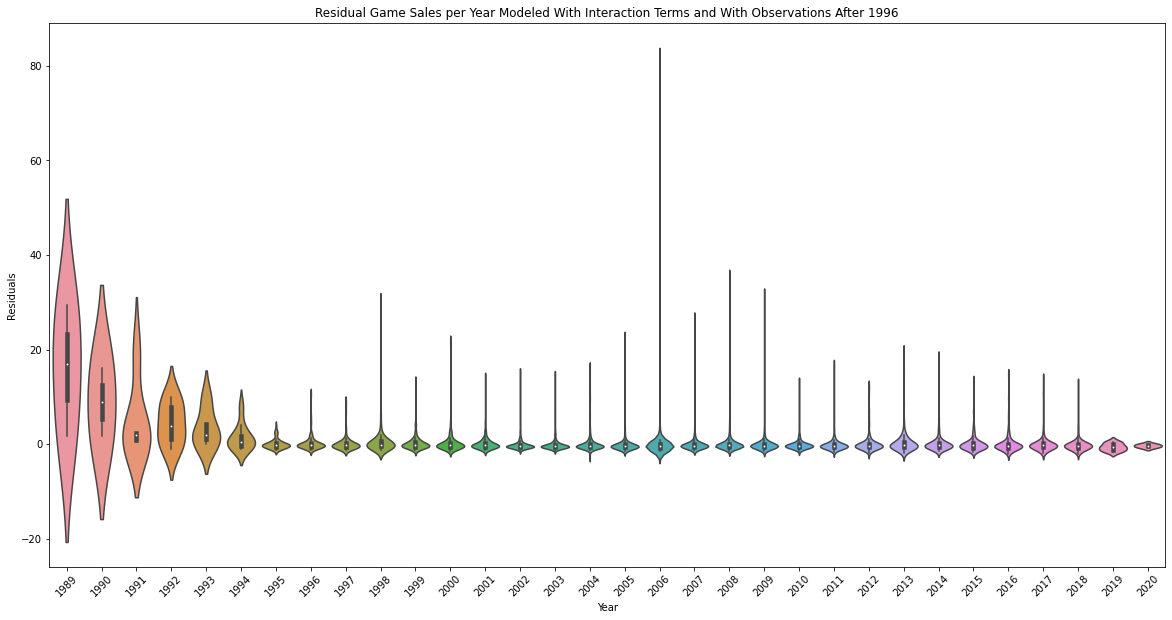

In [31]:
# fits a new model on the data with interaction terms but only for observations later than 1996
interaction_late = interaction[interaction["Year"] >= 1996]
X = interaction_late.iloc[:, 1:].values
y = interaction_late.iloc[:, 0].values
reg_late = LinearRegression().fit(X, y)

# predicts sales and calculates residuals, stores in seperate columns
resids = interaction.copy()
resids['Year'] = resids['Year'].astype(int)
resids['Predicted'] = reg_late.predict(resids.iloc[:, 1:])
resids['Residuals'] = resids['Total_Sales'] - resids['Predicted']

# plots residuals
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Residual Game Sales per Year Modeled With Interaction Terms and With Observations After 1996")
plt.xticks(rotation=45)
sns.violinplot(x='Year', y='Residuals', data=resids, ax=ax, scale='width')

Still, it seems that we get the same result. This new plot looks pretty much identical to the previous violin plots. Our suspected problem might not have been the real issue after all. It also makes sense why the plots turned out to be the same because, if you noticed from the scatter plot, there is not that much data on games before 1996. Therefore, ommiting the data before 1996 would not have influenced the model all that much. 

Nevertheless, our residuals are still as unevenly spread as before. This suggests that we might need a different kind of regression model instead of a linear one. Instead, we can definately try a Random Forest Regression. For this, we will be using the respective RandomForestRegressor module from Sci-Kit Learn. 

A Random Forest Regressor is a forest of multiple decisions trees that predict values based on decisions. Imagine each node as a decision you have to make based on your independent variable value. From there, you would have to pick a route to go on based on the decision you made, which leads to another node. A decision tree would make predictions by going through each node's decision, following the paths based on those decisions, until finally landing at a leaf node, which represents a prediction.

The problem is that a singular tree can often times be too brittle. If one were to make a decision tree model, one would have to figure out the decisions that have to be made first: the most important and significant decisions. For us to be able to figure out what the most significant decision is, we would have to maximize information gain. However, this will lead to being more prone to overfitting the model. Therefore, our solution to this is to use multiple trees. 

To make sure the trees in our random forest are not all equally brittle, we can use a certain subset (with overlap) of our data for each tree we make. Sci-Kit Learn has a way of not only doing this, but also allowing us to specify the maximum depth of each tree, the number of trees in our forest, and the number of samples we will allow for the making of each tree. For our purposes, we will be using 5 trees and a maximum of 3000 out of the ~9000 samples for each tree, since the module's default of 100 trees would have been really expensive to compute and would not have made that much of a difference. We will not be specifying the maximum depth of each tree simply because we want the leaf nodes to be pure values.

In [32]:
# import modules for our new approach
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# fits the data with a random forest regressor model, sets a random state parameter
forest = RandomForestRegressor(n_estimators=5, max_samples=3000, random_state=1)
X = interaction.iloc[:, 1:].values
y = interaction.iloc[:, 0].values
forest = forest.fit(X, Y)

Now that we have out Random Forest Regression model, we can plot each of our trees. Note that we will only be plotting the first two levels and the root node for simplicity. If we were to print out the entire tree, it would be too much to fit into a singular plot and we would not be able to see the decisions that go on in each node.

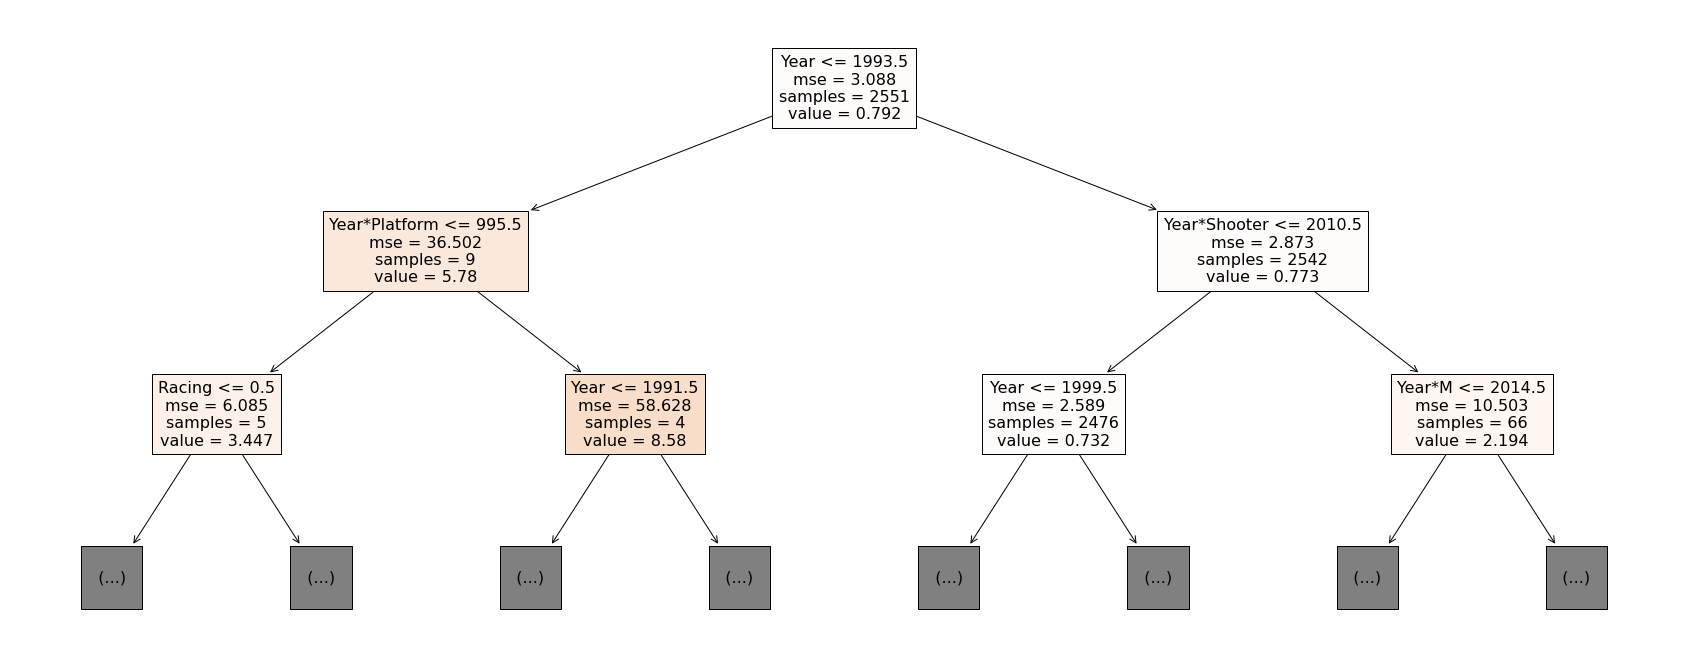

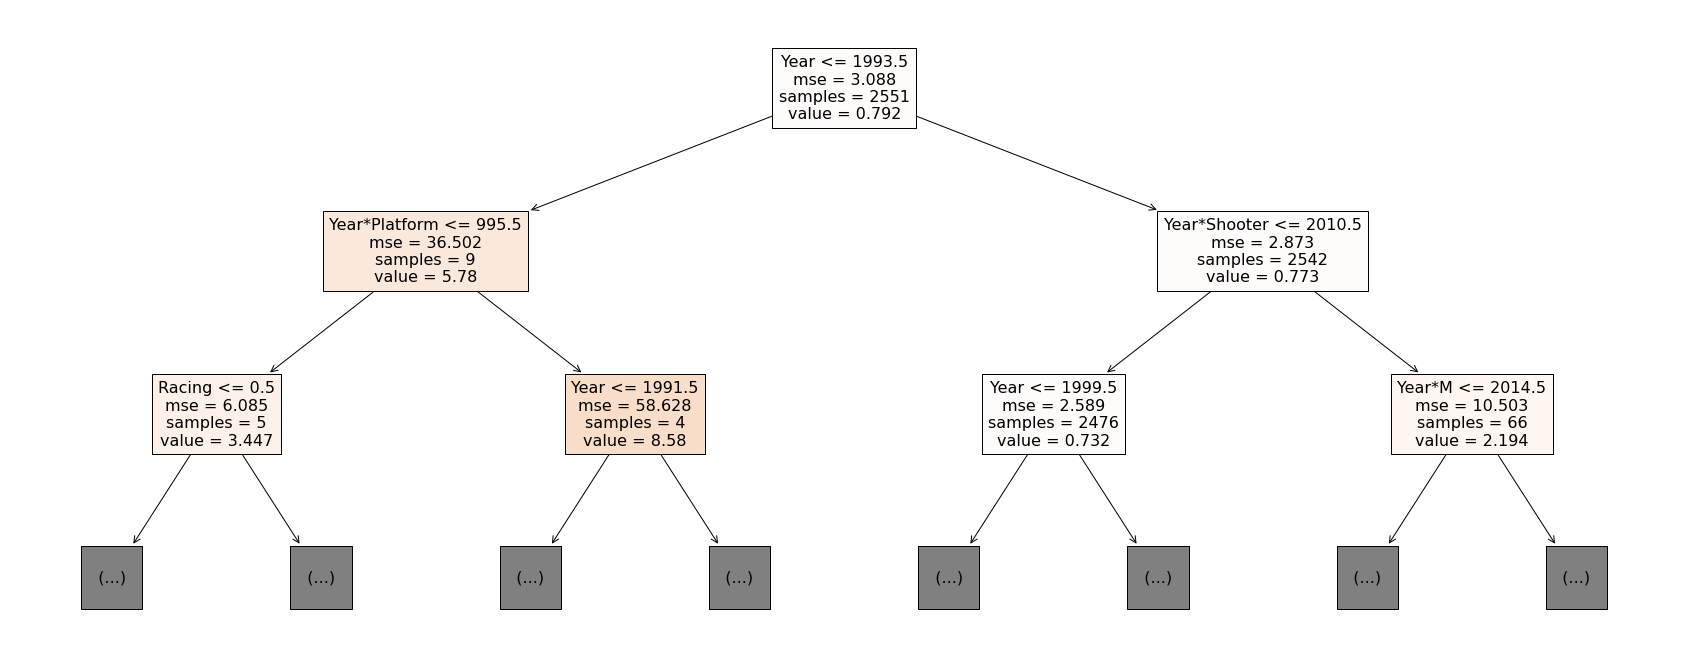

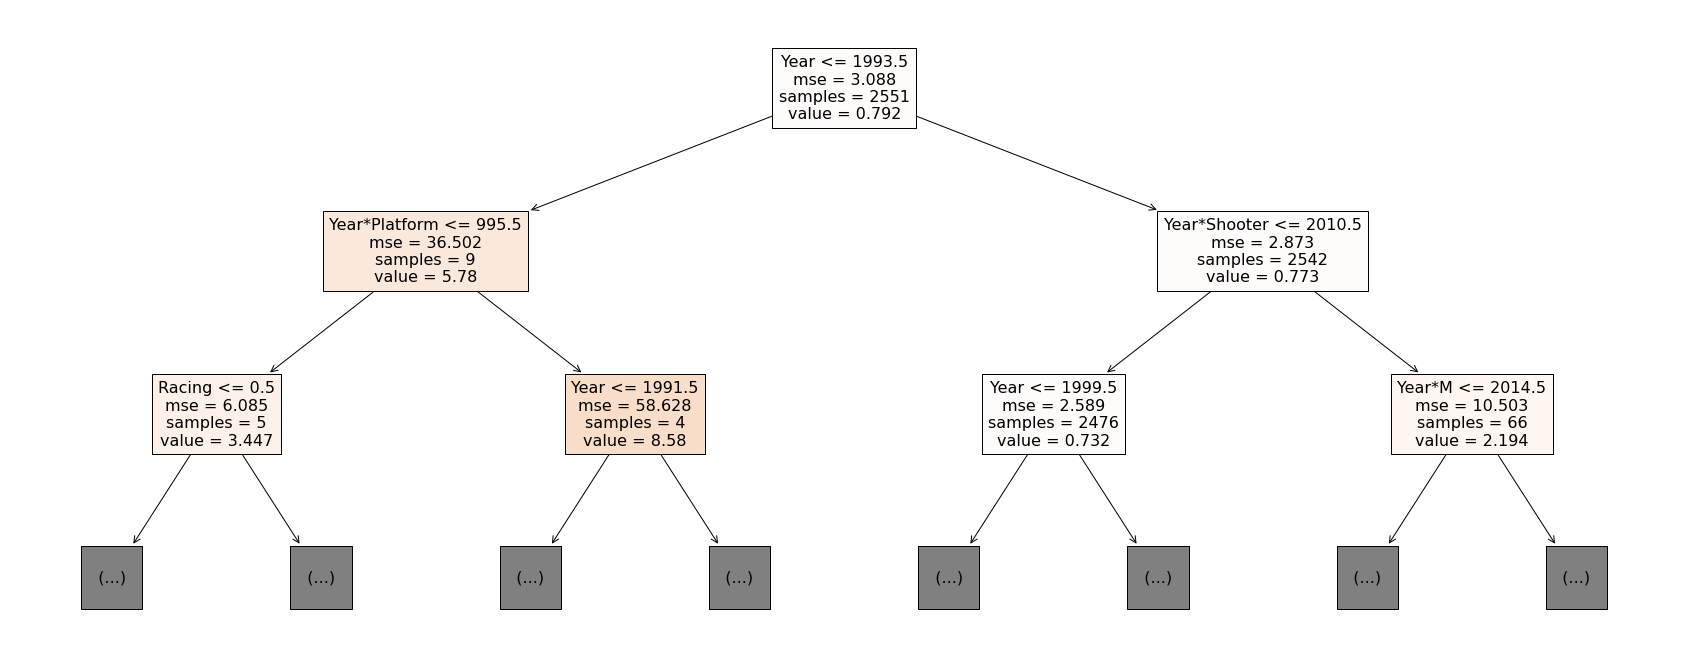

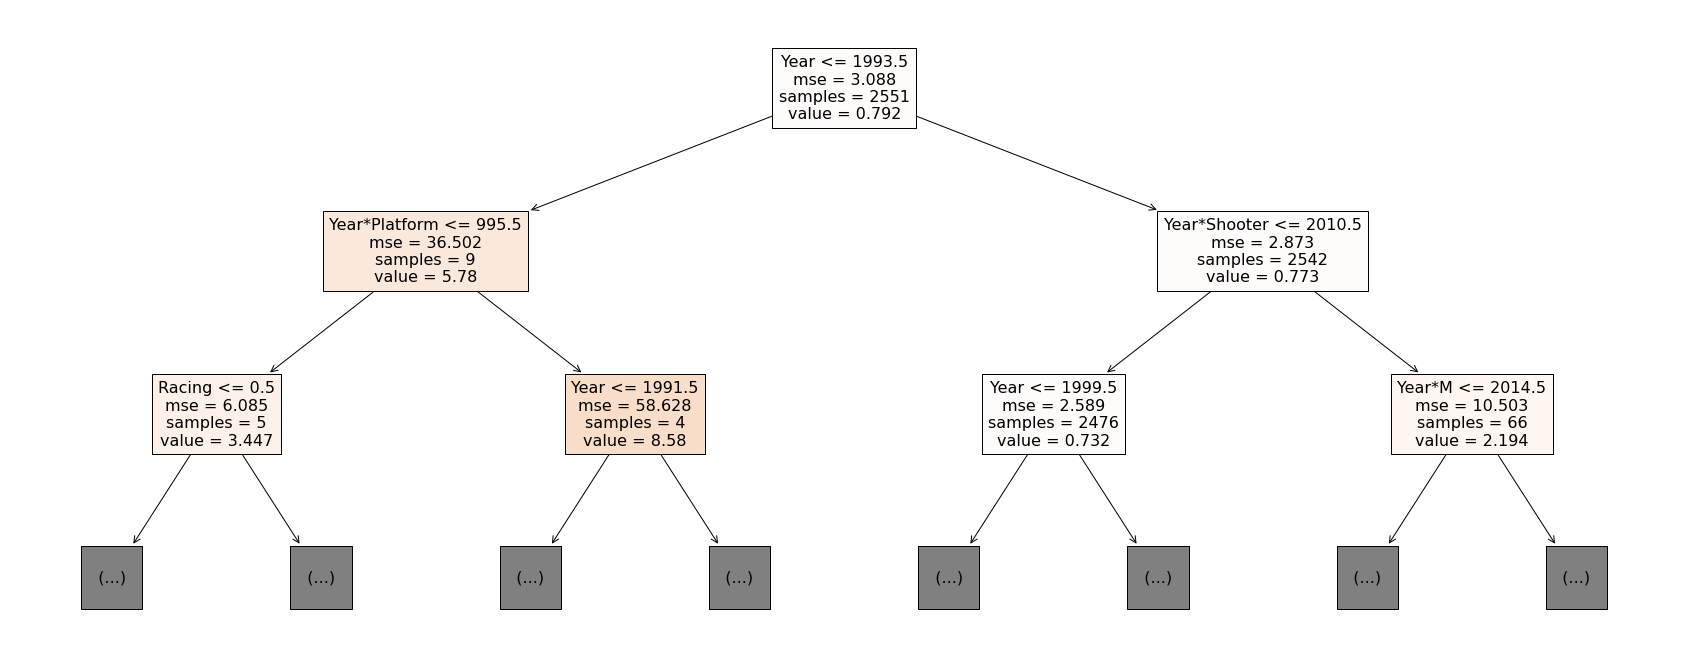

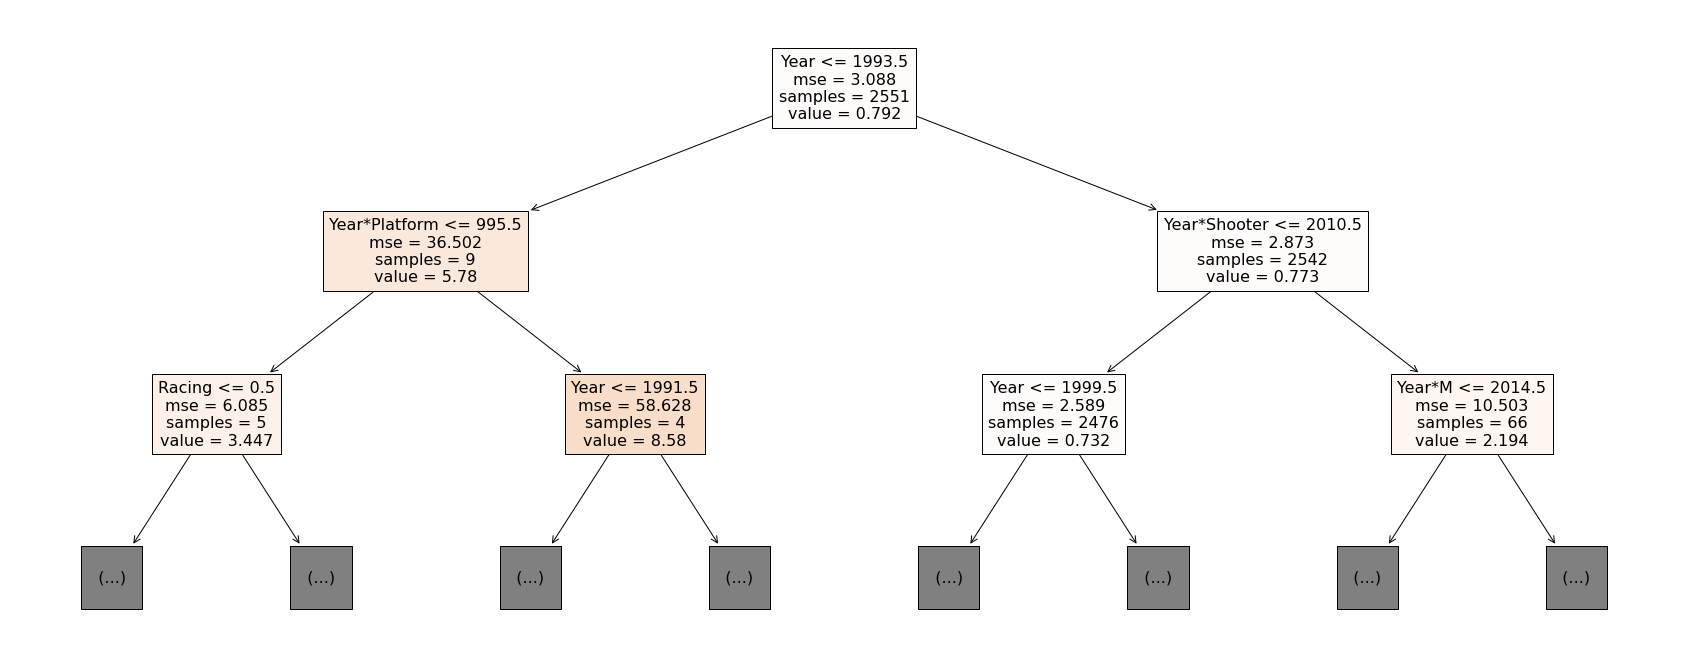

In [33]:
# plots the tree?
for tree_in_forest in forest.estimators_:
    fig, ax = plt.subplots(figsize=(30, 12))
    tree.plot_tree(forest.estimators_[0], feature_names=list(interaction.iloc[:, 1:]), filled=True, max_depth=2)
    plt.show()

Showing the upper levels of each tree in the forest gives us a clue of what the most significant decisions are for each tree. Based on the plots above, we can see that whether or not the game was published after 1993 makes a big difference on which half of the tree you go, as evident in the root nodes of all the trees. Other important factors are the interaction terms between year and whether or not the game a Platformer and whether or not the game is a Shooter, since nodes using these features as decisions fall right after the root node. 

Note that by default, if you were to create random forest models again and again, you would get a different forest with different trees and nodes each time. This is because the random forest regressor randomly decides which feature to use for each decision at each node. Of course, Sci-Kit Learn lets us control this by setting a random state. Hence, why we set a random state parameter when instantiating the random forest regressor.

Now, let's try predicting some values to see whether or not our predictions come close. Since this model is not plottable on a scatter plot, there is no way to plot the residuals for it. So instead of doing that, we will conduct a 10-fold cross validation procedure. This procedure begins by spliting the dataset into ten seperate subsets. It will then iterate through each subset, holding out the current subset, and using it as a test set for the model trained by all the other observations. It calculates the total error for each iteration, allowing us to see how far this model is off by.

As comparison, we will conduct the same procedure on our linear regression model with the same interaction terms and compare the errors we get against the errors from the random forest model. We will conduct another two-tailed t-test on the difference of the errors with a significance level of 0.05 since we want most differences to be "close" to zero.

In [34]:
from sklearn.model_selection import cross_val_score

# performs 10-fold cross-validation on the random forest and linear regressors
forest_score = cross_val_score(forest, X, y, cv=10)
linreg_score = cross_val_score(reg, X, y, cv=10)
print(forest_score, linreg_score)

# paired t-test comparing the random forest and linear regressors
# since we have 10 difference values, our degrees of freedom = 9
# so, with our 0.05 significance level, our t value is +-1.833 since we are conducting a two-tailed test
tdist = 1.8331
diff = np.subtract(linreg_score, forest_score)
xbar = np.mean(diff)
sx = np.std(diff)
t = xbar / (sx / np.sqrt(10))

if t >= tdist:
    print("On average, the linear regressor had significantly higher error than our random forest regressor.")
elif t <= -tdist:
    print("On average, the linear regressor had significantly lower error than our random forest regressor.")
else:
    print("On average, the linear regressor did not have significantly higher or lower error than our",\
          "random forest regressor.")

[-6.41166466e-01 -2.47355536e+01 -7.94140843e+01 -4.48954167e+02
 -4.25664552e+02 -1.70554389e+03 -3.08198407e+03 -4.66855478e+03
 -5.35719139e+03 -1.12772258e+04] [-6.59447214e-01 -8.27560335e+00 -1.54077094e+01 -1.01985341e+02
 -2.62704040e+02 -8.14962599e+02 -1.42524354e+03 -3.15019611e+03
 -4.30750501e+03 -2.96445439e+14]
On average, the linear regressor did not have significantly higher or lower error than our random forest regressor.


Sadly it appears that our random forest regression did not make too much of an improvement to our linear regression. Just as our t-test tells us, we do not have enough evidence to reject the null hypothesis that the mean difference between the errors of the regressors is not significantly high nor low.

## Conclusion
The task of predicting video game sales is actually harder then what one might suspect. It is especially hard to do within a single tutorial. However, we still tried to do it by looking closely at how the game's ESRB rating, country of origin, genre, and year of production might play into how good the game might do in sales. 

Through our exploratory data analysis we discovered  that the best performing ESRB ratings over time were M and E10, Sports games grossed the highest sales in total, Japanese and American games do the best out of all games, and that the bestselling platforms of all time seem to be of older geneneration. We also saw a persistent pattern in the majority of our scatter plots, where certain games appear high above the rest of the observations in certain years. This became more appearent as we tried to use two different machine learning regressors to try and predict sales using interaction terms between the variables mentioned above. As expected, we ended up with residuals that were heavily skewed right and came nowhere close to accurate.

The insights we achieved from this tutorial sheds light on the possibility that there are perhaps other variables that play a role into how well a game sells. Therefore, more data needs to be collected and more experimentation needs to be done so we can get closer to finding our what exactly makes a game sell. There are still questions that have not been answered by this tutorial whose answers have yet to be discovered. Does the availibility of a game translate to more sales? If so, how can we measure availibility? Perhaps we could have looked into how the critic scores of each title correlates with the game's sales. We might also wonder what it is about a game that makes the critic scores go up if it happens to be strongly correlated with total sales. As you can see, we can already go on and on without end about the possible questions we might ask about how well a product does in the video game industry.

## Related Links
If you are interested in doing more Data Science on the topic of video game sales, you might find the following links useful.

**Video Game Data**
- Video Game Data from Kaggle: https://www.kaggle.com/ashaheedq/video-games-sales-2019
- Video Game Region Data from Kaggle: https://www.kaggle.com/andreshg/videogamescompaniesregions

**Statistical Analysis**
- Ways of Data Imputation: https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/
- Seaborn Violin Plot: https://seaborn.pydata.org/generated/seaborn.violinplot.html
- Matplotlib Violin Plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.violinplot.html

**Machine Learning**
- Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Dummy Variables and Interactions in Linear Regressions: https://towardsdatascience.com/on-the-role-of-dummy-variables-and-interactions-in-linear-regression-558d9644fc67
- Random Forest Regression: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

**Other Video Game Information**
- Guide to ESRB Ratings: https://www.esrb.org/ratings-guide/
- Guide to Video Game Genres: https://www.idtech.com/blog/different-types-of-video-game-genres